In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
# %matplotlib widget
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_digits
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn import preprocessing
from datetime import datetime
from datetime import timedelta
import statistics as s
import scipy as stats
import statsmodels.api as sm
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import letter
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets, transforms
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.datasets import mnist
import yfinance as yf
from datetime import date
import matplotlib.dates as mdates
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
from sklearn.neighbors import LocalOutlierFactor
import schedule
import time

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
gcode_orig = pd.read_csv("gcode_parsing.txt", delimiter='\t')

spiral_gcode_orig = pd.read_csv("spiral_gcode.txt", delimiter='\t')

cube_movement = pd.read_csv("data3.csv", delimiter=',')

cube_gcode_orig = pd.read_csv("gcode.txt", delimiter='\t')

# gcode_a = gcode_orig

# maska = ~gcode_a.astype(str).apply(lambda col: col.str.contains('A', na=False))
# # Replace values in the DataFrame where the mask is True with 0
# gcode_a[maska] = 0

In [ ]:
# cube_gcode

In [ ]:
gcode = gcode_orig.copy()

In [ ]:
spiral_gcode = spiral_gcode_orig.copy()

In [ ]:
gcode_a = gcode_orig.copy()
gcode_b = gcode_orig.copy()
gcode_x = gcode_orig.copy()
gcode_y = gcode_orig.copy()
gcode_z = gcode_orig.copy()

In [ ]:
# spiral_gcode_y

In [ ]:
gcode_y

,n,x,y,z,a,b,f,i,j,k
0,N30,NaN,X2.5,Y2.5,NaN,NaN,NaN,NaN,NaN,NaN
1,N35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,N40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,N45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,N5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
8044,N40225,X0.1443,Y-0.6713,Z0.3601,B8989.761,F1146.7051,NaN,NaN,NaN,NaN
8045,N40230,X0.1658,Y-0.6725,Z0.3507,B8986.302,F1145.3931,NaN,NaN,NaN,NaN
8046,N40235,X0.1875,Y-0.6738,Z0.3396,B8982.701,F1100.3659,NaN,NaN,NaN,NaN
8047,N40240,X0.2084,Y-0.675,Z0.3272,B8979.102,F1100.9995,NaN,NaN,NaN,NaN


In [ ]:
gcode_a

,n,x,y,z,a,b,f,i,j,k
0,N30,NaN,X2.5,Y2.5,NaN,NaN,NaN,NaN,NaN,NaN
1,N35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,N40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,N45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,N5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
8044,N40225,X0.1443,Y-0.6713,Z0.3601,B8989.761,F1146.7051,NaN,NaN,NaN,NaN
8045,N40230,X0.1658,Y-0.6725,Z0.3507,B8986.302,F1145.3931,NaN,NaN,NaN,NaN
8046,N40235,X0.1875,Y-0.6738,Z0.3396,B8982.701,F1100.3659,NaN,NaN,NaN,NaN
8047,N40240,X0.2084,Y-0.675,Z0.3272,B8979.102,F1100.9995,NaN,NaN,NaN,NaN


In [ ]:
gcode_b

,n,x,y,z,a,b,f,i,j,k
0,N30,NaN,X2.5,Y2.5,NaN,NaN,NaN,NaN,NaN,NaN
1,N35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,N40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,N45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,N5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
8044,N40225,X0.1443,Y-0.6713,Z0.3601,B8989.761,F1146.7051,NaN,NaN,NaN,NaN
8045,N40230,X0.1658,Y-0.6725,Z0.3507,B8986.302,F1145.3931,NaN,NaN,NaN,NaN
8046,N40235,X0.1875,Y-0.6738,Z0.3396,B8982.701,F1100.3659,NaN,NaN,NaN,NaN
8047,N40240,X0.2084,Y-0.675,Z0.3272,B8979.102,F1100.9995,NaN,NaN,NaN,NaN


In [ ]:
gcode_y

,n,x,y,z,a,b,f,i,j,k
0,N30,NaN,X2.5,Y2.5,NaN,NaN,NaN,NaN,NaN,NaN
1,N35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,N40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,N45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,N5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
8044,N40225,X0.1443,Y-0.6713,Z0.3601,B8989.761,F1146.7051,NaN,NaN,NaN,NaN
8045,N40230,X0.1658,Y-0.6725,Z0.3507,B8986.302,F1145.3931,NaN,NaN,NaN,NaN
8046,N40235,X0.1875,Y-0.6738,Z0.3396,B8982.701,F1100.3659,NaN,NaN,NaN,NaN
8047,N40240,X0.2084,Y-0.675,Z0.3272,B8979.102,F1100.9995,NaN,NaN,NaN,NaN


In [ ]:
maska = ~gcode_a.astype(str).apply(lambda col: col.str.contains('A', na=False))
# Replace values in the DataFrame where the mask is True with 0
gcode_a[maska] = 0

maskb = ~gcode_b.astype(str).apply(lambda col1: col1.str.contains('B', na=False))
# Replace values in the DataFrame where the mask is True with 0
gcode_b[maskb] = 0

maskx = ~gcode_x.astype(str).apply(lambda col2: col2.str.contains('X', na=False))
# Replace values in the DataFrame where the mask is True with 0
gcode_x[maskx] = 0

masky = ~gcode_y.astype(str).apply(lambda col3: col3.str.contains('Y', na=False))
# Replace values in the DataFrame where the mask is True with 0
gcode_y[masky] = 0

maskz = ~gcode_z.astype(str).apply(lambda col4: col4.str.contains('Z', na=False))
# Replace values in the DataFrame where the mask is True with 0
gcode_z[maskz] = 0

In [ ]:
spiral_gcode_a = spiral_gcode_orig.copy()
spiral_gcode_b = spiral_gcode_orig.copy()
spiral_gcode_x = spiral_gcode_orig.copy()
spiral_gcode_y = spiral_gcode_orig.copy()
spiral_gcode_z = spiral_gcode_orig.copy()

spiralmaska = ~spiral_gcode_a.astype(str).apply(lambda col: col.str.contains('A', na=False))
# Replace values in the DataFrame where the mask is True with 0
spiral_gcode_a[spiralmaska] = 0

spiralmaskb = ~spiral_gcode_b.astype(str).apply(lambda col1: col1.str.contains('B', na=False))
# Replace values in the DataFrame where the mask is True with 0
spiral_gcode_b[spiralmaskb] = 0

spiralmaskx = ~spiral_gcode_x.astype(str).apply(lambda col2: col2.str.contains('X', na=False))
# Replace values in the DataFrame where the mask is True with 0
spiral_gcode_x[spiralmaskx] = 0

spiralmasky = ~spiral_gcode_y.astype(str).apply(lambda col3: col3.str.contains('Y', na=False))
# Replace values in the DataFrame where the mask is True with 0
spiral_gcode_y[spiralmasky] = 0

spiralmaskz = ~spiral_gcode_z.astype(str).apply(lambda col4: col4.str.contains('Z', na=False))
# Replace values in the DataFrame where the mask is True with 0
spiral_gcode_z[spiralmaskz] = 0


aspiralmelted_df = spiral_gcode_a.reset_index().melt(id_vars='index', var_name='original_column', value_name='value')
non_zero_values = aspiralmelted_df[aspiralmelted_df['value'] != 0]
combined_column = non_zero_values.groupby('index')['value'].apply(list)
result_series = combined_column.reindex(spiral_gcode_a.index, fill_value=0)
a_spiral_df = pd.DataFrame(result_series)
a_spiral_df.columns = ['b']

bspiralmelted_df = spiral_gcode_b.reset_index().melt(id_vars='index', var_name='original_column', value_name='value')
non_zero_values = bspiralmelted_df[bspiralmelted_df['value'] != 0]
combined_column = non_zero_values.groupby('index')['value'].apply(list)
result_series = combined_column.reindex(spiral_gcode_b.index, fill_value=0)
b_spiral_df = pd.DataFrame(result_series)
b_spiral_df.columns = ['b']

xspiralmelted_df = spiral_gcode_x.reset_index().melt(id_vars='index', var_name='original_column', value_name='value')
non_zero_values = xspiralmelted_df[xspiralmelted_df['value'] != 0]
combined_column = non_zero_values.groupby('index')['value'].apply(list)
result_series = combined_column.reindex(spiral_gcode_x.index, fill_value=0)
x_spiral_df = pd.DataFrame(result_series)
x_spiral_df.columns = ['x']

yspiralmelted_df = spiral_gcode_y.reset_index().melt(id_vars='index', var_name='original_column', value_name='value')
non_zero_values = yspiralmelted_df[yspiralmelted_df['value'] != 0]
combined_column = non_zero_values.groupby('index')['value'].apply(list)
result_series = combined_column.reindex(spiral_gcode_y.index, fill_value=0)
y_spiral_df = pd.DataFrame(result_series)
y_spiral_df.columns = ['y']

zspiralmelted_df = spiral_gcode_z.reset_index().melt(id_vars='index', var_name='original_column', value_name='value')
non_zero_values = zspiralmelted_df[zspiralmelted_df['value'] != 0]
combined_column = non_zero_values.groupby('index')['value'].apply(list)
result_series = combined_column.reindex(spiral_gcode_z.index, fill_value=0)
z_spiral_df = pd.DataFrame(result_series)
z_spiral_df.columns = ['z']

In [ ]:

cube_gcode_a = cube_gcode_orig.copy()
cube_gcode_b = cube_gcode_orig.copy()
cube_gcode_x = cube_gcode_orig.copy()
cube_gcode_y = cube_gcode_orig.copy()
cube_gcode_z = cube_gcode_orig.copy()

cubemaska = ~cube_gcode_a.astype(str).apply(lambda col: col.str.contains('A', na=False))
# Replace values in the DataFrame where the mask is True with 0
cube_gcode_a[cubemaska] = 0

cubemaskb = ~cube_gcode_b.astype(str).apply(lambda col1: col1.str.contains('B', na=False))
# Replace values in the DataFrame where the mask is True with 0
cube_gcode_b[cubemaskb] = 0

cubemaskx = ~cube_gcode_x.astype(str).apply(lambda col2: col2.str.contains('X', na=False))
# Replace values in the DataFrame where the mask is True with 0
cube_gcode_x[cubemaskx] = 0

cubemasky = ~cube_gcode_y.astype(str).apply(lambda col3: col3.str.contains('Y', na=False))
# Replace values in the DataFrame where the mask is True with 0
cube_gcode_y[cubemasky] = 0

cubemaskz = ~cube_gcode_z.astype(str).apply(lambda col4: col4.str.contains('Z', na=False))
# Replace values in the DataFrame where the mask is True with 0
cube_gcode_z[cubemaskz] = 0


acubemelted_df = cube_gcode_a.reset_index().melt(id_vars='index', var_name='original_column', value_name='value')
non_zero_values = acubemelted_df[acubemelted_df['value'] != 0]
combined_column = non_zero_values.groupby('index')['value'].apply(list)
result_series = combined_column.reindex(cube_gcode_a.index, fill_value=0)
a_cube_df = pd.DataFrame(result_series)
a_cube_df.columns = ['a']

bcubemelted_df = cube_gcode_b.reset_index().melt(id_vars='index', var_name='original_column', value_name='value')
non_zero_values = bcubemelted_df[bcubemelted_df['value'] != 0]
combined_column = non_zero_values.groupby('index')['value'].apply(list)
result_series = combined_column.reindex(cube_gcode_b.index, fill_value=0)
b_cube_df = pd.DataFrame(result_series)
b_cube_df.columns = ['b']

xcubemelted_df = cube_gcode_x.reset_index().melt(id_vars='index', var_name='original_column', value_name='value')
non_zero_values = xcubemelted_df[xcubemelted_df['value'] != 0]
combined_column = non_zero_values.groupby('index')['value'].apply(list)
result_series = combined_column.reindex(cube_gcode_x.index, fill_value=0)
x_cube_df = pd.DataFrame(result_series)
x_cube_df.columns = ['x']

ycubemelted_df = cube_gcode_y.reset_index().melt(id_vars='index', var_name='original_column', value_name='value')
non_zero_values = ycubemelted_df[ycubemelted_df['value'] != 0]
combined_column = non_zero_values.groupby('index')['value'].apply(list)
result_series = combined_column.reindex(cube_gcode_y.index, fill_value=0)
y_cube_df = pd.DataFrame(result_series)
y_cube_df.columns = ['y']

zcubemelted_df = cube_gcode_z.reset_index().melt(id_vars='index', var_name='original_column', value_name='value')
non_zero_values = zcubemelted_df[zcubemelted_df['value'] != 0]
combined_column = non_zero_values.groupby('index')['value'].apply(list)
result_series = combined_column.reindex(cube_gcode_z.index, fill_value=0)
z_cube_df = pd.DataFrame(result_series)
z_cube_df.columns = ['z']

In [ ]:
a_cube_df

,a
0,0
1,0
2,0
3,0
4,0
...,...
595,0
596,0
597,0
598,[A0.]


In [ ]:
z_spiral_df

,z
0,[Z1.6729]
1,[Z1.6443]
2,[Z1.6157]
3,[Z1.6095]
4,0
...,...
5732,[Z0.]
5733,0
5734,0
5735,0


In [ ]:
# spiral_df = pd.concat([a_spiral_df, b_spiral_df, x_spiral_df, y_spiral_df, z_spiral_df], axis=1)
# spiral_df.to_csv('spiral_gcode_movement_num.csv', index=False)

In [ ]:
##gcode_a.to_csv('gcode_a.csv', index=False)

In [ ]:
gcode_a

,n,x,y,z,a,b,f,i,j,k
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
8044,0,0,0,0,0,0,0,0,0,0
8045,0,0,0,0,0,0,0,0,0,0
8046,0,0,0,0,0,0,0,0,0,0
8047,0,0,0,0,0,0,0,0,0,0


In [ ]:
amelted_df = gcode_a.reset_index().melt(id_vars='index', var_name='original_column', value_name='value')

# 2. Filter non-zero values
non_zero_values = amelted_df[amelted_df['value'] != 0]

# 3. Group and aggregate into a list
combined_column = non_zero_values.groupby('index')['value'].apply(list)

# # 4. Re-index to ensure original index size and order
# # Fill missing values (indices with no non-zero elements) with empty lists
result_series = combined_column.reindex(gcode_a.index, fill_value=0)

# # Create a new DataFrame with the combined column
a_df = pd.DataFrame(result_series) # , columns=['combined_non_zero_elements'])
a_df.columns = ['a']


bmelted_df = gcode_b.reset_index().melt(id_vars='index', var_name='original_column', value_name='value')
non_zero_values = bmelted_df[bmelted_df['value'] != 0]
combined_column = non_zero_values.groupby('index')['value'].apply(list)
result_series = combined_column.reindex(gcode_b.index, fill_value=0)
b_df = pd.DataFrame(result_series)
b_df.columns = ['b']


xmelted_df = gcode_x.reset_index().melt(id_vars='index', var_name='original_column', value_name='value')
non_zero_values = xmelted_df[xmelted_df['value'] != 0]
combined_column = non_zero_values.groupby('index')['value'].apply(list)
result_series = combined_column.reindex(gcode_x.index, fill_value=0)
x_df = pd.DataFrame(result_series)
x_df.columns = ['x']


ymelted_df = gcode_y.reset_index().melt(id_vars='index', var_name='original_column', value_name='value')
non_zero_values = ymelted_df[ymelted_df['value'] != 0]
combined_column = non_zero_values.groupby('index')['value'].apply(list)
result_series = combined_column.reindex(gcode_y.index, fill_value=0)
y_df = pd.DataFrame(result_series)
y_df.columns = ['y']


zmelted_df = gcode_z.reset_index().melt(id_vars='index', var_name='original_column', value_name='value')
non_zero_values = zmelted_df[zmelted_df['value'] != 0]
combined_column = non_zero_values.groupby('index')['value'].apply(list)
result_series = combined_column.reindex(gcode_z.index, fill_value=0)
z_df = pd.DataFrame(result_series)
z_df.columns = ['z']

In [ ]:
z_df.head()

,z
0,0
1,0
2,0
3,0
4,0


In [ ]:
gcode_movement = pd.concat([a_df, b_df, x_df, y_df, z_df], axis=1)#, ignore_index=True)

In [ ]:
# gcode_movement.to_csv('spiral_gcode_movement_num.csv', index=False)

In [ ]:
pocket_move_df = pd.read_csv('pocket_sorted_time.csv') #'spiral_date_test1.txt', delimiter='\t')
spiral_move_df = pd.read_csv('spiral_sorted_time_2.csv') #'spiral_date_test1.txt', delimiter='\t')

In [ ]:
gcode_movement_values = pd.read_csv("gcode_movement_num.csv", delimiter=',')
spiral_gcode_values = pd.read_csv("spiral_gcode_movement_num.csv", delimiter=',') # fix set
cube_gcode_values = pd.read_csv("cube_gcode_movement_num.csv", delimiter=',')
# spiral_movement = pd.read_csv('spiral_sorted_time_2.csv')

In [ ]:
spiral_gcode_values

,b,b.1,x,y,z
0,0,0,['X0.0193'],['Y-0.0158'],['Z1.6729']
1,0,0,['X-0.0193'],['Y0.0158'],['Z1.6443']
2,0,0,['X0.0193'],['Y-0.0158'],['Z1.6157']
3,0,0,['X0.025'],['Y0.'],['Z1.6095']
4,0,0,['X-0.025'],0,0
...,...,...,...,...,...
5732,0,0,0,0,['Z0.']
5733,0,0,['X2.5'],['Y2.5'],0
5734,0,0,0,0,0
5735,['A0.'],['B0.'],0,0,0


In [ ]:
# spiral_movement

In [ ]:
gcode_movement_values

,a,b,x,y,z
0,0,0.000,2.5000,2.5000,0.0000
1,0,0.000,0.0000,0.0000,0.0000
2,0,0.000,0.0000,0.0000,0.0000
3,0,0.000,0.0000,0.0000,0.0000
4,0,0.000,0.0000,0.0000,0.0000
...,...,...,...,...,...
8044,0,8989.761,0.1443,-0.6713,0.3601
8045,0,8986.302,0.1658,-0.6725,0.3507
8046,0,8982.701,0.1875,-0.6738,0.3396
8047,0,8979.102,0.2084,-0.6750,0.3272


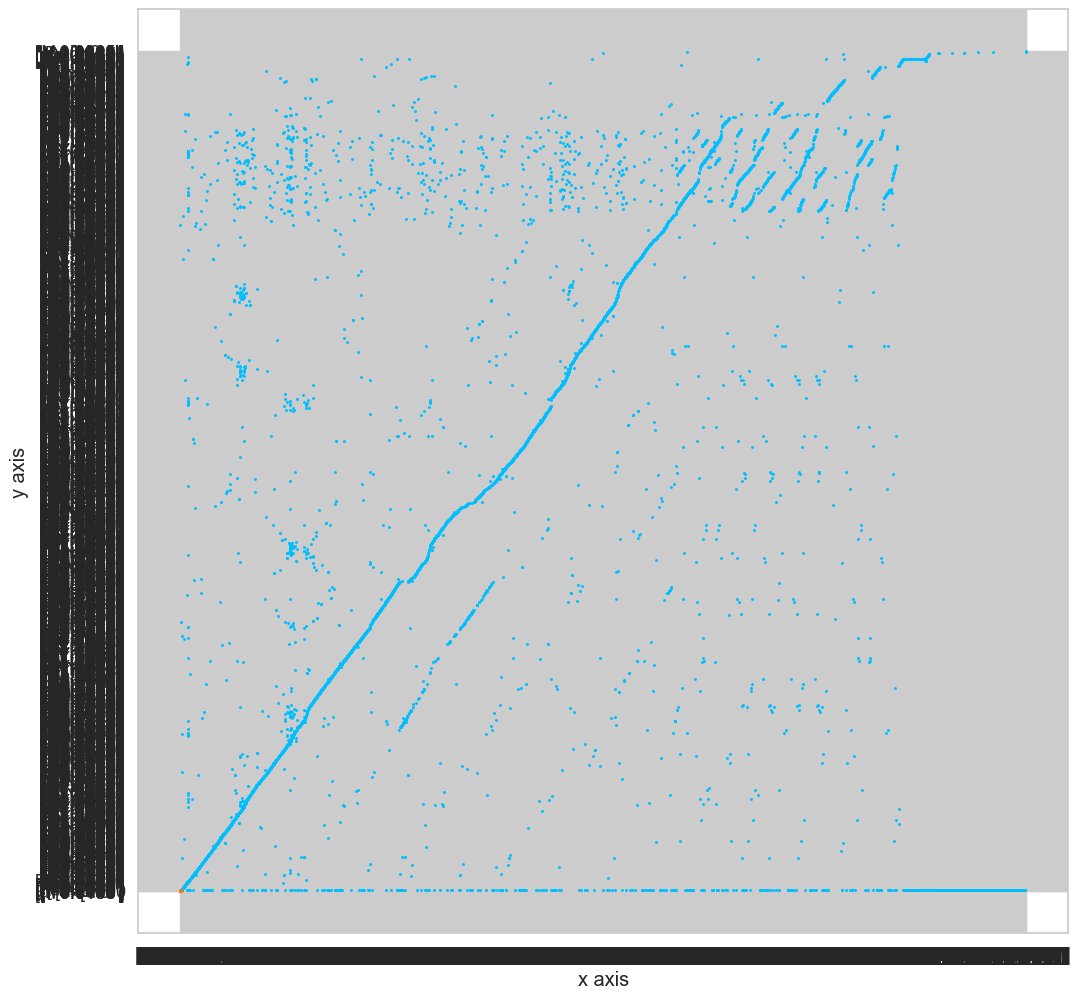

In [ ]:
plt.figure(figsize=(12, 12))
plt.scatter(spiral_gcode_values['x'], spiral_gcode_values['y'], marker='.', s=5)
plt.scatter(spiral_move_df['xpm'], spiral_move_df['ypm'], marker='.', s=5)
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.show()

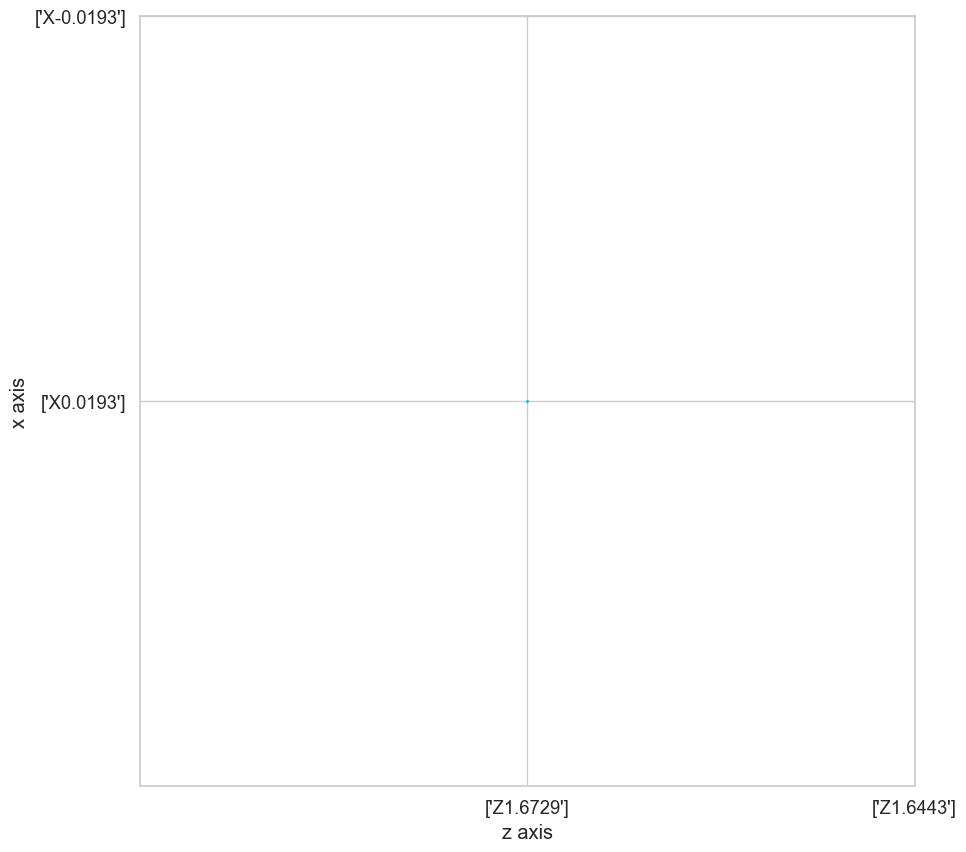

In [ ]:
plt.figure(figsize=(10, 10))
plt.scatter(spiral_gcode_values['z'], spiral_gcode_values['x'], marker='.', s=5)
plt.xlabel('z axis')
plt.ylabel('x axis')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()

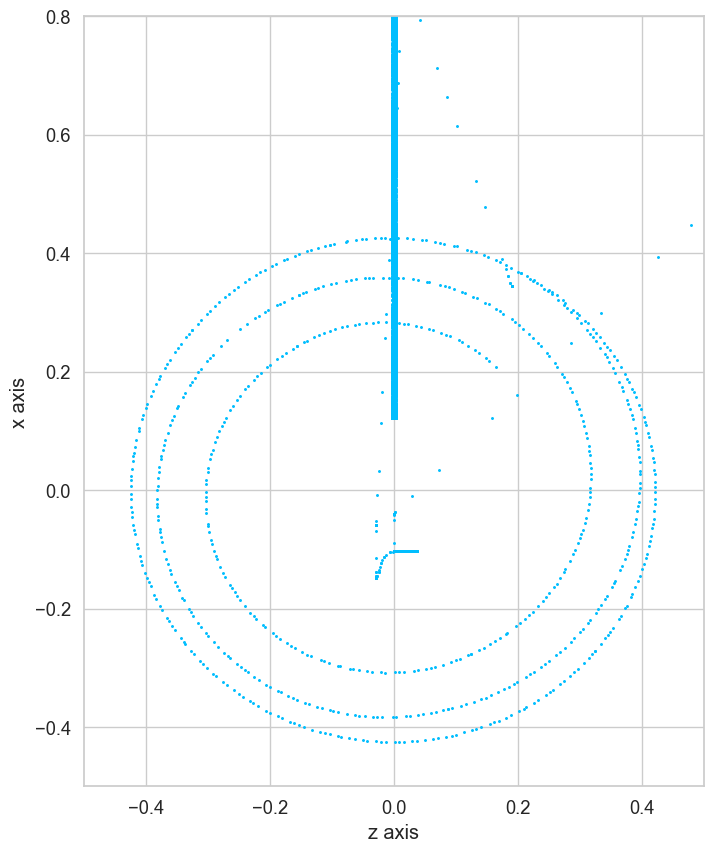

In [ ]:
plt.figure(figsize=(8, 10))
plt.scatter(spiral_move_df['xpm'], spiral_move_df['ypm'], marker='.', s=5)
plt.xlabel('z axis')
plt.ylabel('x axis')
plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.8)
plt.show()

In [ ]:
spiral_gcode_values

,b,b.1,x,y,z
0,0,0,['X0.0193'],['Y-0.0158'],['Z1.6729']
1,0,0,['X-0.0193'],['Y0.0158'],['Z1.6443']
2,0,0,['X0.0193'],['Y-0.0158'],['Z1.6157']
3,0,0,['X0.025'],['Y0.'],['Z1.6095']
4,0,0,['X-0.025'],0,0
...,...,...,...,...,...
5732,0,0,0,0,['Z0.']
5733,0,0,['X2.5'],['Y2.5'],0
5734,0,0,0,0,0
5735,['A0.'],['B0.'],0,0,0


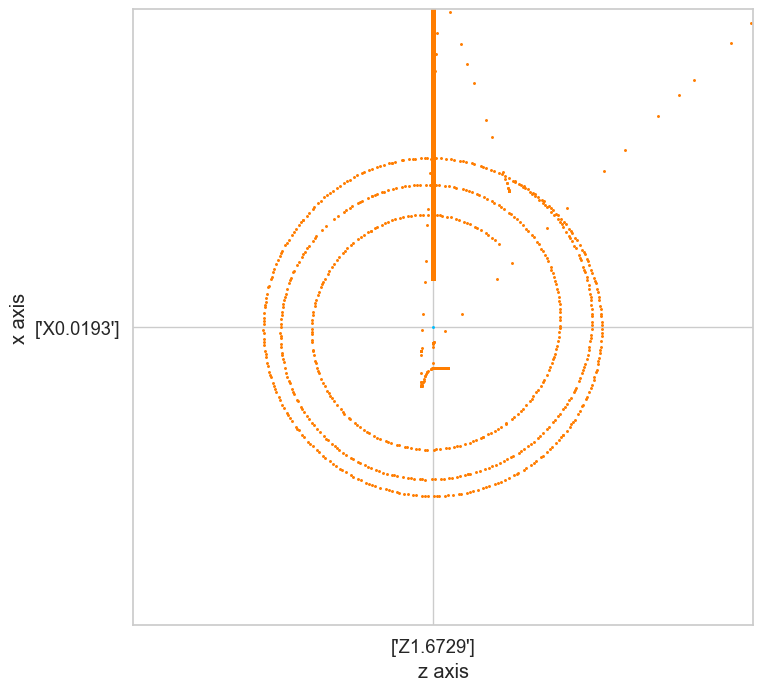

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(spiral_gcode_values['z'], spiral_gcode_values['x'], marker='.', s=5) # spiral_gcode_values['z'][:2500]
plt.scatter(spiral_move_df['xpm'], spiral_move_df['ypm'], marker='.', s=5)
plt.xlabel('z axis')
plt.ylabel('x axis')
plt.xlim(-0.75, 0.8)
plt.ylim(-0.75, 0.8)
plt.show()

because the gcode will have fewer points than the movement data, determine if the gcode is within the vector space of the movement data. May be that the gcode will be within a range of the movement data vector space. 
- Determine polynomial function that describes the line fit through the movement data, then determine if the gcode exists within a range of this functions output.
- measure orthogonal distances of gcode points to polynomial graph

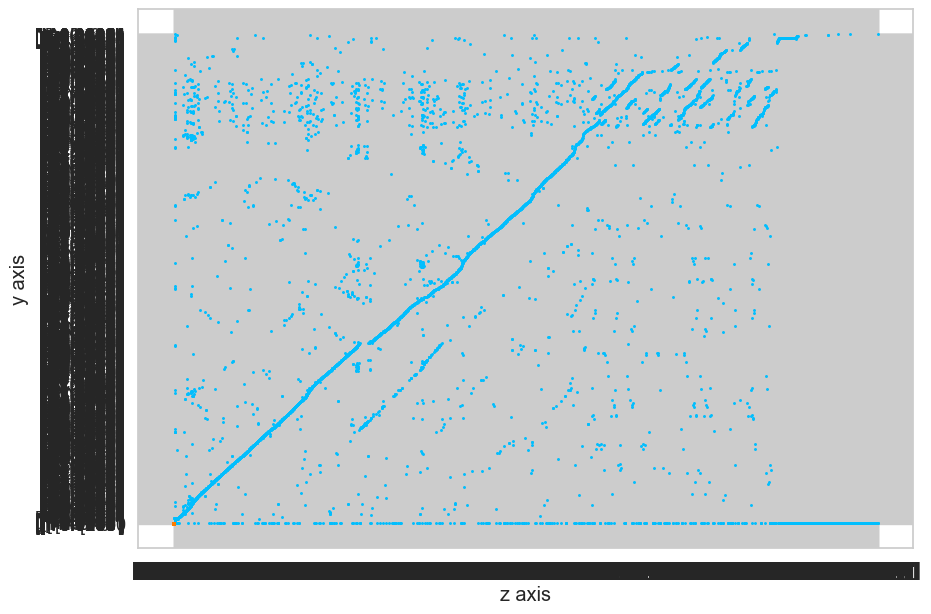

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(spiral_gcode_values['z'], spiral_gcode_values['y'], marker='.', s=5)
plt.scatter(spiral_move_df['zpm'], spiral_move_df['ypm'], marker='.', s=5)
plt.xlabel('z axis')
plt.ylabel('y axis')
# plt.ylim(-1.75, 0.25)
plt.show()

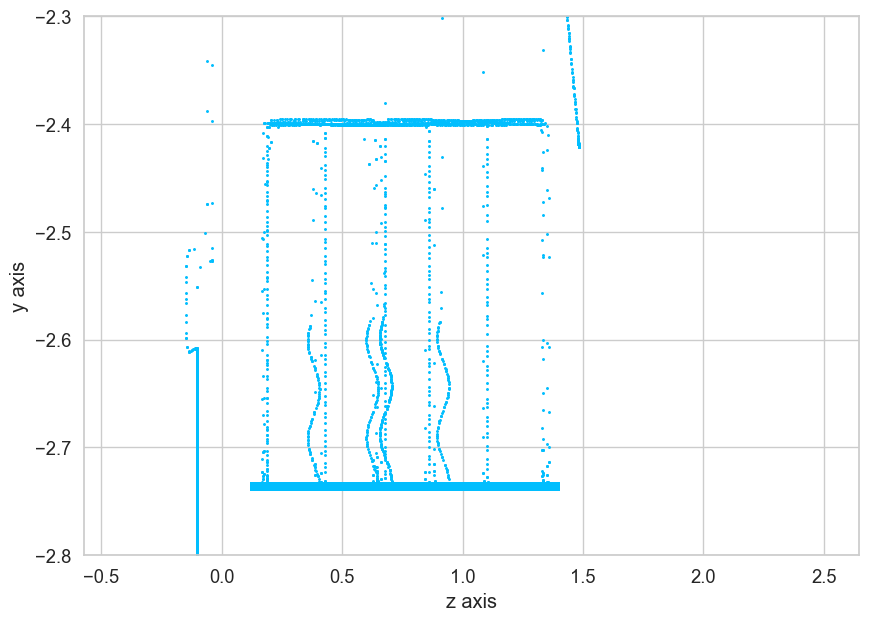

In [ ]:
plt.figure(figsize=(10, 7))
# plt.scatter(spiral_gcode_values['z'], spiral_gcode_values['y'], marker='.', s=5)
plt.scatter(spiral_move_df['ypm'], spiral_move_df['zpm'], marker='.', s=5)
plt.xlabel('z axis')
plt.ylabel('y axis')
plt.ylim(-2.8, -2.3)
plt.show()

In [ ]:
# cube_movement = pd.read_csv("data 3.csv", delimiter=',')

In [ ]:
cube_movement

,a,b,x,y,z
0,0.0,0.0000,2.5,2.5,0.0
1,0.0,0.0000,2.5,2.5,0.0
2,0.0,0.0000,2.5,2.5,0.0
3,0.0,0.0000,2.5,2.5,0.0
4,0.0,0.0000,2.5,2.5,0.0
...,...,...,...,...,...
139453,0.0,20.1381,2.5,2.5,0.0
139454,0.0,20.1381,2.5,2.5,0.0
139455,0.0,18.3001,2.5,2.5,0.0
139456,0.0,18.3001,2.5,2.5,0.0


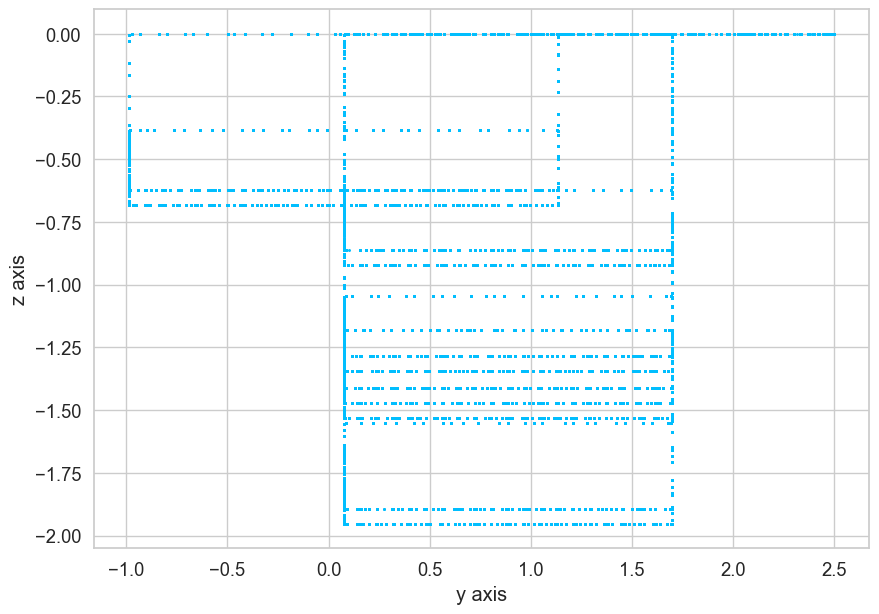

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(cube_movement['y'], cube_movement['z'], marker='.', s=5)
plt.xlabel('y axis')
plt.ylabel('z axis')
# plt.ylim(-2.8, -2.3)
plt.show()

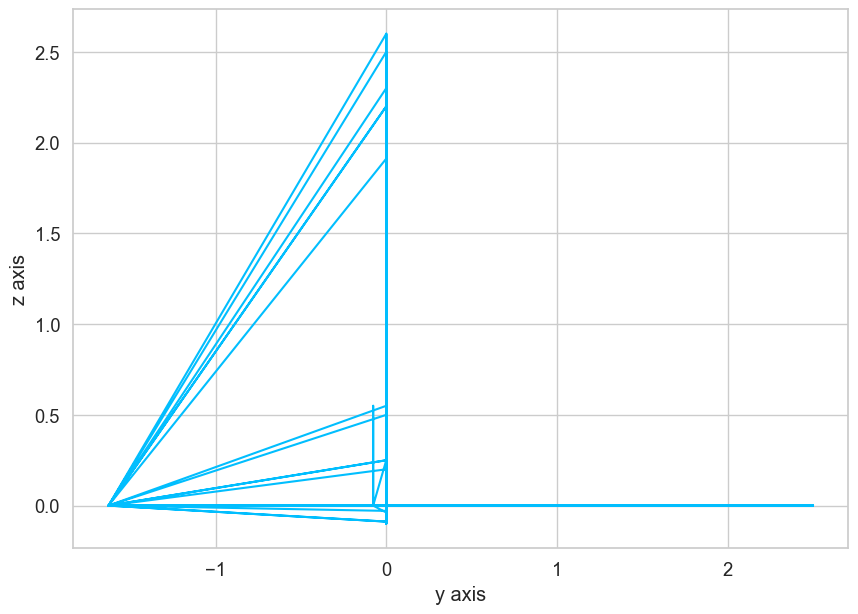

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(cube_gcode_values['y'], cube_gcode_values['z']) #, marker='.', s=5)
plt.xlabel('y axis')
plt.ylabel('z axis')
# plt.ylim(-2.8, -2.3)
plt.show()

In [ ]:
cube_gcode_values

,a,b,x,y,z
0,0,0,0.0,0.0,0.0
1,0,0,0.0,0.0,0.0
2,0,0,0.0,0.0,0.0
3,0,0,0.0,0.0,0.0
4,0,0,2.5,2.5,0.0
...,...,...,...,...,...
595,0,0,0.0,0.0,0.0
596,0,0,2.5,2.5,0.0
597,0,0,0.0,0.0,0.0
598,0,0,0.0,0.0,0.0


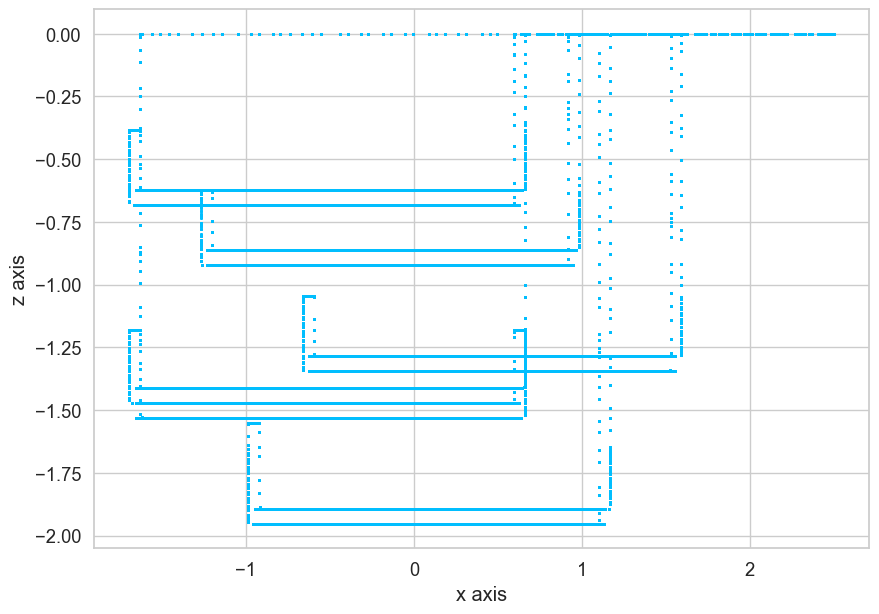

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(cube_movement['x'], cube_movement['z'], marker='.', s=5)
plt.xlabel('x axis')
plt.ylabel('z axis')
# plt.ylim(-2.8, -2.3)
plt.show()

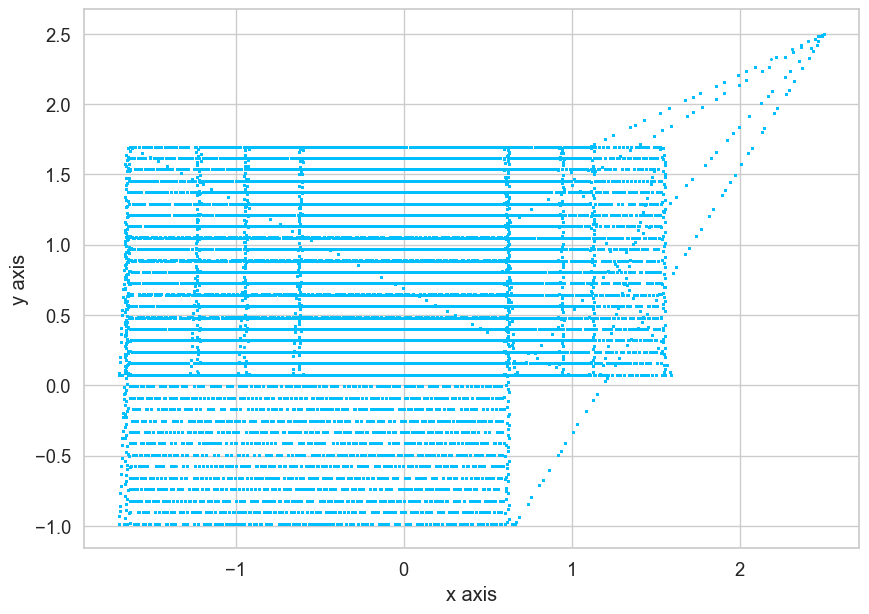

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(cube_movement['x'], cube_movement['y'], marker='.', s=5)
plt.xlabel('x axis')
plt.ylabel('y axis')
# plt.ylim(-2.8, -2.3)
plt.show()

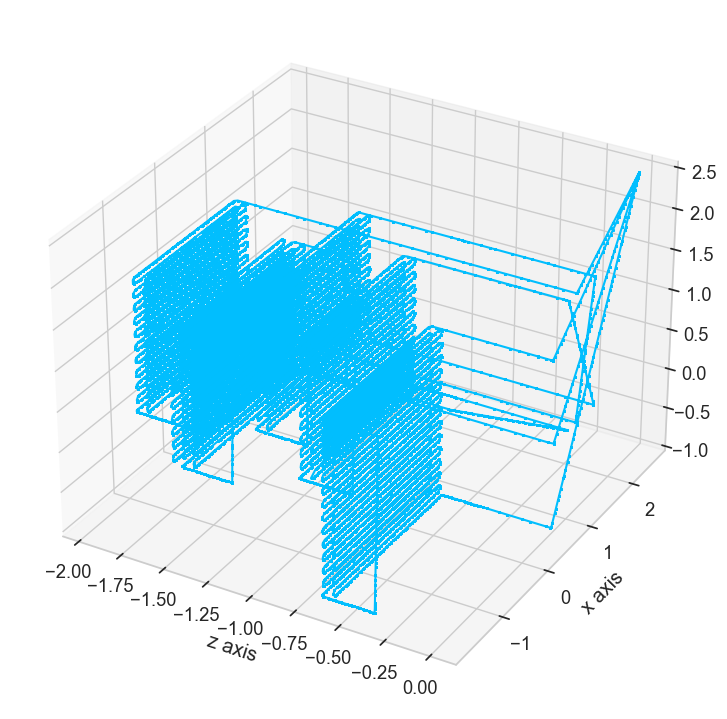

In [ ]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
# fig.canvas.draw()
# fig.set_layout_engine("none")
ax.set_position([-0.75, 0.025, 2.5, 1])
# fig = plt.figure()
# ax = Axes3D(fig)
plt.plot(cube_movement['z'], cube_movement['x'], cube_movement['y'], marker='.', markersize=2)
plt.xlabel('z axis')
plt.ylabel('x axis')
plt.show()

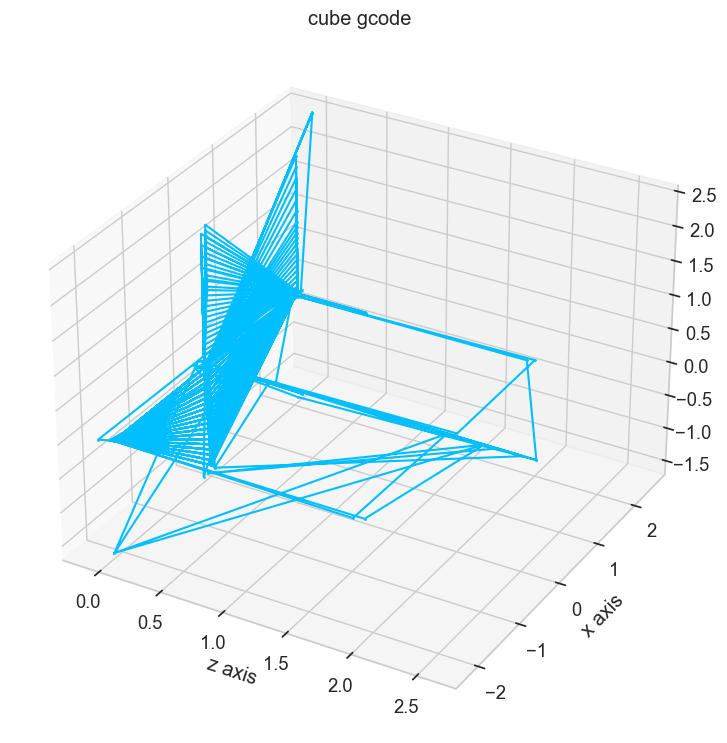

In [ ]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
# fig.canvas.draw()
# fig.set_layout_engine("none")
ax.set_position([-0.75, 0.025, 2.5, 1])
# fig = plt.figure()
# ax = Axes3D(fig)
plt.plot(cube_gcode_values['z'], cube_gcode_values['x'], cube_gcode_values['y'], marker='.', markersize=2)
plt.title('cube gcode')
plt.xlabel('z axis')
plt.ylabel('x axis')
plt.show()

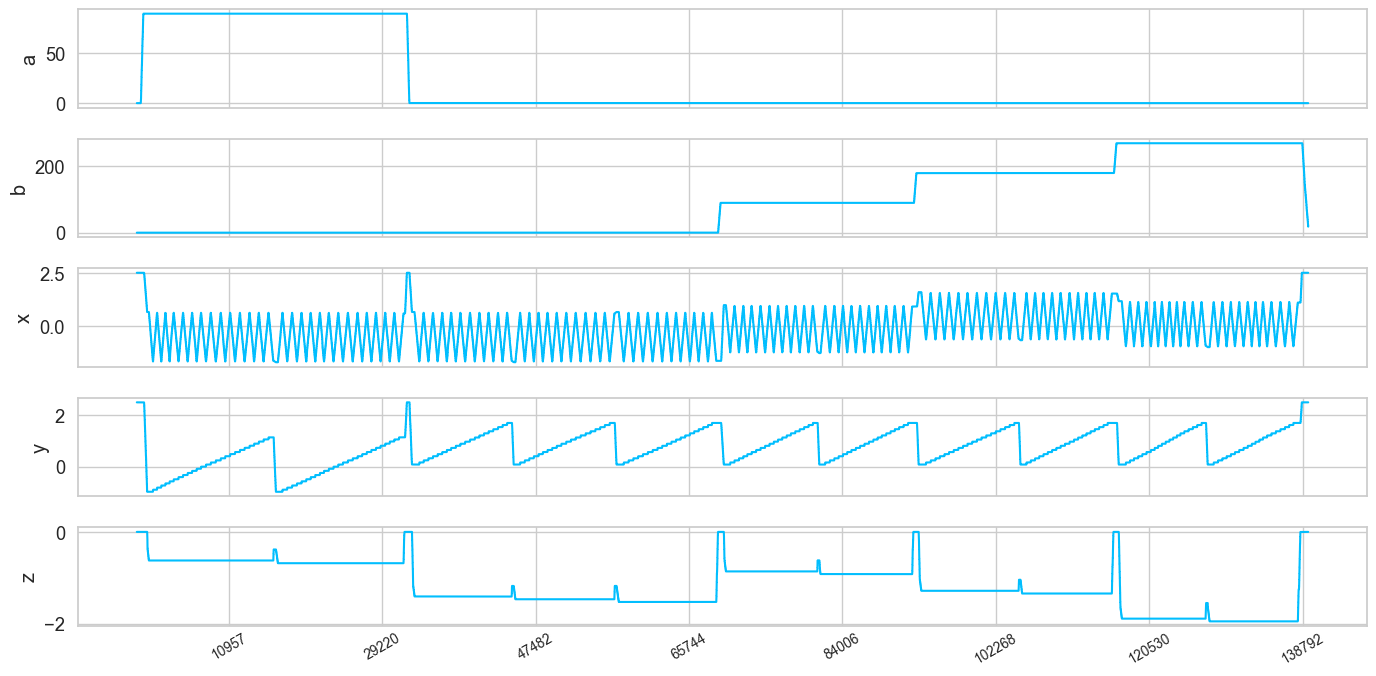

In [ ]:
import matplotlib.dates as mdates

df = cube_movement
def data_plot(df):
    # Plot line charts
    df_plot = df.copy()

    ncols = 1
    nrows = int(round(df_plot.shape[1] / ncols, 0))

    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, figsize=(14, 7))
    for i, ax in enumerate(fig.axes):
        sns.lineplot(data=df_plot.iloc[:, i], ax=ax)
        ax.tick_params(axis="x", rotation=30, labelsize=10, length=0)
        ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    fig.tight_layout()
    plt.show()

# Plot the data
data_plot(df)
# df

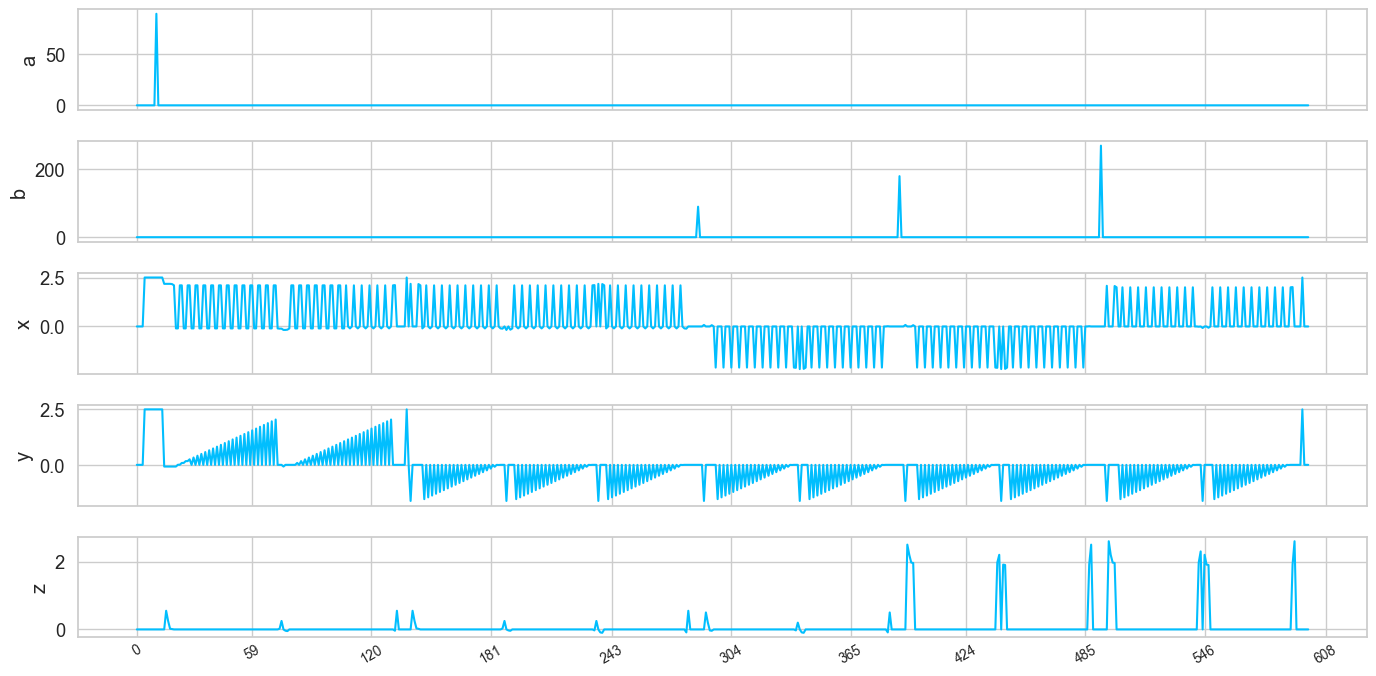

<Axes: >

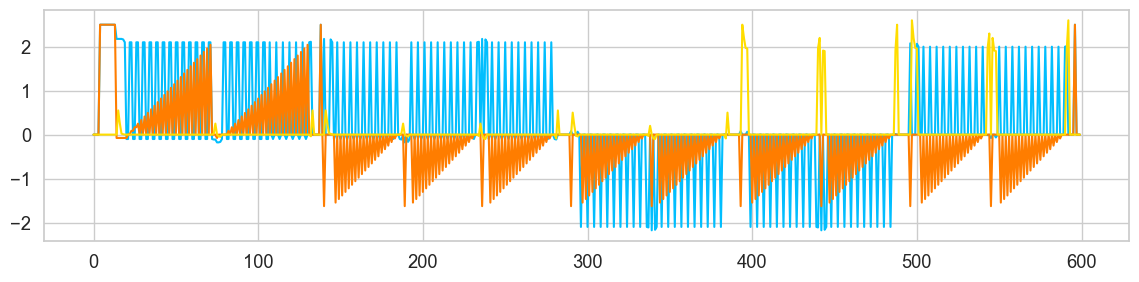

In [ ]:
import matplotlib.dates as mdates

df = cube_gcode_values
def data_plot(df):
    # Plot line charts
    df_plot = df.copy()

    ncols = 1
    nrows = int(round(df_plot.shape[1] / ncols, 0))

    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, figsize=(14, 7))
    for i, ax in enumerate(fig.axes):
        sns.lineplot(data=df_plot.iloc[:, i], ax=ax)
        ax.tick_params(axis="x", rotation=30, labelsize=10, length=0)
        ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    fig.tight_layout()
    plt.show()

# Plot the data
data_plot(df)
cube_gcode_values['x'].plot(figsize=(14, 3))
cube_gcode_values['y'].plot(figsize=(14, 3))
cube_gcode_values['z'].plot(figsize=(14, 3))

In [ ]:
# #forces_spiral_df = spiral_log.interpolate()
# #forces_spiral_df = spiral_log_X.fillna(0)
# kmean_spiral = cube_movement
# kmean_spiral = cube_movement

# # Scale the features using StandardScaler
# scaler = StandardScaler()
# kmean_spiral_scaled = pd.DataFrame(scaler.fit_transform(kmean_spiral))

# kmeans_sp = KMeans(init='random', n_clusters=6, random_state=0, n_init=100).fit(kmean_spiral_scaled)

# #Cluster centers and labels
# #print("Cluster Centers:\n", kmeans.cluster_centers_)
# #print("Labels:", kmeans.labels_)
# centroids = kmeans_sp.cluster_centers_
# labels = kmeans_sp.fit_predict(kmean_spiral)
# unique_labels = np.unique(labels)
# centroid_labels = [centroids[i] for i in labels]

# # Visualize the clusters
# plt.figure(figsize=(8, 6))
# plt.scatter(kmean_spiral_scaled.iloc[:, 0], kmean_spiral_scaled.iloc[:, 1], s=200, c=kmeans_sp.labels_, cmap='viridis', alpha=0.5)
# plt.scatter(kmeans_sp.cluster_centers_[:, 0], kmeans_sp.cluster_centers_[:, 1], 
#             s=200, c='red', marker='.', label='Centroids')

# # for i in unique_labels:
# #     plt.scatter(centroids[:, 0], centroids[:, 1], 
# #                 marker='.', s=200, linewidths=3, color='r',
# #                 label=unique_labels[i])
    
# #plt.xlim(-3, 15)
# plt.title("K-Means Clustering")
# plt.gca().set_facecolor('whitesmoke')
# plt.gcf().set_facecolor('whitesmoke')
# plt.xlim(-2, 5)
# plt.ylim(-2, 5)
# plt.legend()
# plt.show()
# #print(centroid_labels)


In [ ]:
cube_gcode_values

,a,b,x,y,z
0,0,0,0.0,0.0,0.0
1,0,0,0.0,0.0,0.0
2,0,0,0.0,0.0,0.0
3,0,0,0.0,0.0,0.0
4,0,0,2.5,2.5,0.0
...,...,...,...,...,...
595,0,0,0.0,0.0,0.0
596,0,0,2.5,2.5,0.0
597,0,0,0.0,0.0,0.0
598,0,0,0.0,0.0,0.0


In [ ]:
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

from sklearn.preprocessing import MinMaxScaler

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import mean_squared_error, r2_score
from collections import defaultdict

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

Colour_Palette = ['#01BEFE', '#FF7D00', '#FFDD00', '#FF006D', '#ADFF02', '#8F00FF']
sns.set_palette(sns.color_palette(Colour_Palette))

tqdm.pandas()

In [ ]:
# import yfinance as yf
# from datetime import date

# end_date = 1168.30011 # date.today().strftime("%Y-%m-%d")
# start_date = '0.0'

# df = cube_movement # yf.download('AAPL', start=start_date, end=end_date)

# base_time = datetime(2025, 7, 1)  # Epoch time as a reference
# datetime_series = [base_time + timedelta(seconds=seconds) for seconds in df['timestamp']] 
# df['timestamp'] = datetime_series
# # df = df.set_index(df['timestamp'])
# df.set_index('timestamp', inplace=True)
# # Print the results
# for dt in datetime_series:
#     print(dt)

# # Inspect the data
# print(df.head())
# print(df.info())

In [ ]:
import math
from sklearn.preprocessing import MinMaxScaler

# Train test split
training_data_len = math.ceil(len(df) * .8)
print(training_data_len)

# Splitting the dataset
train_data = df[:training_data_len].iloc[:, :1]
test_data = df[training_data_len:].iloc[:, :1]
print(train_data.shape, test_data.shape)

# Selecting Open Price values
dataset_train = train_data.values
# Reshaping 1D to 2D array
dataset_train = np.reshape(dataset_train, (-1, 1))
print(dataset_train.shape)

# Selecting Open Price values
dataset_test = test_data.values # was Open.values
# Reshaping 1D to 2D array
dataset_test = np.reshape(dataset_test, (-1, 1))
print(dataset_test.shape)

scaler = MinMaxScaler(feature_range=(0, 1))
# Scaling dataset
scaled_train = scaler.fit_transform(dataset_train)
print(scaled_train[:5])

# Normalizing values between 0 and 1
scaled_test = scaler.fit_transform(dataset_test)
print(scaled_test[:5])

480
(480, 1) (120, 1)
(480, 1)
(120, 1)
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [ ]:
# Create sequences and labels for training data
sequence_length = 50  # Number of time steps to look back
X_train, y_train = [], []
for i in range(len(scaled_train) - sequence_length):
    X_train.append(scaled_train[i:i + sequence_length])
    y_train.append(scaled_train[i + sequence_length])  # Predicting the value right after the sequence
X_train, y_train = np.array(X_train), np.array(y_train)

# Convert data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
print(X_train.shape, y_train.shape)

# Create sequences and labels for testing data
sequence_length = 30  # Number of time steps to look back
X_test, y_test = [], []
for i in range(len(scaled_test) - sequence_length):
    X_test.append(scaled_test[i:i + sequence_length])
    y_test.append(scaled_test[i + sequence_length])  # Predicting the value right after the sequence
X_test, y_test = np.array(X_test), np.array(y_test)

# Convert data to PyTorch tensors
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)
print(X_test.shape, y_test.shape)

torch.Size([430, 50, 1]) torch.Size([430, 1])
torch.Size([90, 30, 1]) torch.Size([90, 1])


In [ ]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, dropout=0.2):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.linear = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.linear(out[:, -1, :])
        return out

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

input_size = 1
num_layers = 3  # Increased number of layers
hidden_size = 128  # Increased number of hidden units
output_size = 1
dropout = 0.2  # Added dropout for regularization

model = LSTMModel(input_size, hidden_size, num_layers, dropout).to(device)
loss_fn = nn.MSELoss(reduction='mean')
optimizer = optim.Adam(model.parameters(), lr=1e-3)  # Learning rate

batch_size = 32  # Adjusted batch size
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

num_epochs = 2  # Increased number of epochs
train_hist = []
test_hist = []

for epoch in range(num_epochs):
    total_loss = 0.0
    model.train()
    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        predictions = model(batch_X)
        loss = loss_fn(predictions, batch_y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    average_loss = total_loss / len(train_loader)
    train_hist.append(average_loss)

    model.eval()
    with torch.no_grad():
        total_test_loss = 0.0

        for batch_X_test, batch_y_test in test_loader:
            batch_X_test, batch_y_test = batch_X_test.to(device), batch_y_test.to(device)
            predictions_test = model(batch_X_test)
            test_loss = loss_fn(predictions_test, batch_y_test)

            total_test_loss += test_loss.item()

        average_test_loss = total_test_loss / len(test_loader)
        test_hist.append(average_test_loss)

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}] - Training Loss: {average_loss:.4f}, Test Loss: {average_test_loss:.4f}')

cpu


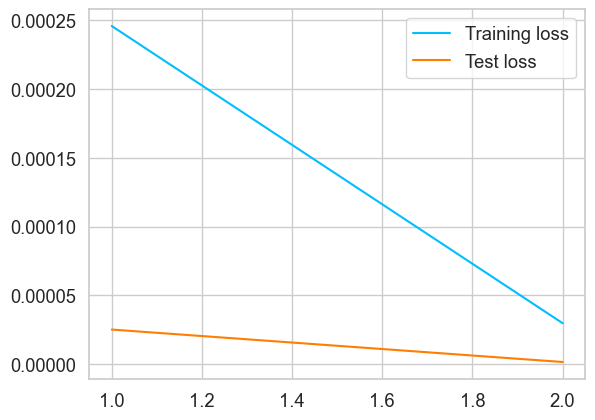

In [ ]:
x = np.linspace(1,num_epochs,num_epochs)
plt.plot(x,train_hist,scalex=True, label="Training loss")
plt.plot(x, test_hist, label="Test loss")
plt.legend()
plt.show()

In [ ]:
# num_forecast_steps = 1
# sequence_to_plot = X_test.squeeze().cpu().numpy()
# historical_data = sequence_to_plot[-1]

# forecasted_values = []
# with torch.no_grad():
#     for _ in range(num_forecast_steps):
#         historical_data_tensor = torch.as_tensor(historical_data).view(1, -1, 1).float().to(device)
#         predicted_value = model(historical_data_tensor).cpu().numpy()[0, 0]
#         forecasted_values.append(predicted_value)
#         historical_data = np.roll(historical_data, shift=-1)
#         historical_data[-1] = predicted_value

# last_date = test_data.index[-1]
# future_dates = pd.date_range(start=last_date + pd.Timedelta(5, unit='seconds'), periods=1)

# plt.rcParams['figure.figsize'] = [14, 4]
# plt.plot(test_data.index[-100:], test_data[-100:], label="test_data", color="b")
# plt.plot(test_data.index[-30:], test_data[-30:], label='actual values', color='green')
# plt.plot(test_data.index[-1:].append(future_dates), np.concatenate([test_data.aposm[-1:], scaler.inverse_transform(np.array(forecasted_values).reshape(-1, 1)).flatten()]), label='forecasted values', color='red')
# # plt.plot(test_data.index[-1:].append(future_dates), np.concatenate([test_data.Open[-1:], scaler.inverse_transform(np.array(forecasted_values).reshape(-1, 1)).flatten()]), label='forecasted values', color='red')

# plt.xlabel('Time Step')
# plt.ylabel('Value')
# #lt.xlim(100, 1000)
# plt.legend()
# plt.title('Time Series Forecasting')
# plt.grid(True)
# plt.show()

# # Evaluate the model and calculate RMSE and R² score
# model.eval()
# with torch.no_grad():
#     test_predictions = []
#     for batch_X_test in X_test:
#         batch_X_test = batch_X_test.to(device).unsqueeze(0)  # Add batch dimension
#         test_predictions.append(model(batch_X_test).cpu().numpy().flatten()[0])

# test_predictions = np.array(test_predictions)

# # Calculate RMSE and R² score
# mse = mean_squared_error(y_test.cpu().numpy(), test_predictions)
# rmse = np.sqrt(mean_squared_error(y_test.cpu().numpy(), test_predictions))
# r2 = r2_score(y_test.cpu().numpy(), test_predictions)

# print(f'MSE: , {mse:.5f}')
# print(f'RMSE: {rmse:.4f}')
# print(f'R² Score: {r2:.4f}')

In [ ]:
cube_gcode_bad_y = cube_gcode_values.copy()
cube_gcode_bad_x = cube_gcode_values.copy()
cube_gcode_good = cube_gcode_values.copy()

In [ ]:
cube_move_good = cube_movement.copy()
cube_move_good2 = cube_movement.copy()
cube_move_bad = cube_movement.copy()
cube_move_bad2 = cube_movement.copy()

In [ ]:
cube_move_good2

,a,b,x,y,z
0,0.0,0.0000,2.5,2.5,0.0
1,0.0,0.0000,2.5,2.5,0.0
2,0.0,0.0000,2.5,2.5,0.0
3,0.0,0.0000,2.5,2.5,0.0
4,0.0,0.0000,2.5,2.5,0.0
...,...,...,...,...,...
139453,0.0,20.1381,2.5,2.5,0.0
139454,0.0,20.1381,2.5,2.5,0.0
139455,0.0,18.3001,2.5,2.5,0.0
139456,0.0,18.3001,2.5,2.5,0.0


In [ ]:
# cube_gcode_bad_y['y'].iloc[:300] = cube_gcode_bad_y['y'].iloc[:300] + 0.15

In [ ]:
cube_gcode_bad_x.loc[cube_gcode_bad_x['x'] != 0, 'x'] = cube_gcode_bad_x.loc[cube_gcode_bad_x['x'] != 0, 'x'] + 0.07 # adds numner to rows in col with no zeros
cube_gcode_bad_x.loc[cube_gcode_bad_x['y'] != 0, 'y'] = cube_gcode_bad_x.loc[cube_gcode_bad_x['y'] != 0, 'y'] + 0.07
cube_gcode_bad_x.loc[cube_gcode_bad_x['z'] != 0, 'z'] = cube_gcode_bad_x.loc[cube_gcode_bad_x['z'] != 0, 'z'] + 0.07

cube_gcode_good.loc[cube_gcode_good['x'] != 0, 'x'] = cube_gcode_good.loc[cube_gcode_good['x'] != 0, 'x'] + 0.05
cube_gcode_good.loc[cube_gcode_good['y'] != 0, 'y'] = cube_gcode_good.loc[cube_gcode_good['y'] != 0, 'y'] + 0.05
cube_gcode_good.loc[cube_gcode_good['z'] != 0, 'z'] = cube_gcode_good.loc[cube_gcode_good['z'] != 0, 'z'] + 0.05


cube_gcode_bad_y.loc[cube_gcode_bad_y['x'] != 0, 'x'] = cube_gcode_bad_y.loc[cube_gcode_bad_y['x'] != 0, 'x'] + 0.1
cube_gcode_bad_y.loc[cube_gcode_bad_y['y'] != 0, 'y'] = cube_gcode_bad_y.loc[cube_gcode_bad_y['y'] != 0, 'y'] + 0.1
cube_gcode_bad_y.loc[cube_gcode_bad_y['z'] != 0, 'z'] = cube_gcode_bad_y.loc[cube_gcode_bad_y['z'] != 0, 'z'] + 0.1

testing on movement data

In [ ]:
cube_move_good.loc[cube_move_good['x'] != 0, 'x'] = cube_move_good.loc[cube_move_good['x'] != 0, 'x'] + 0.02
cube_move_good.loc[cube_move_good['y'] != 0, 'y'] = cube_move_good.loc[cube_move_good['y'] != 0, 'y'] + 0.01
cube_move_good.loc[cube_move_good['z'] != 0, 'z'] = cube_move_good.loc[cube_move_good['z'] != 0, 'z'] - 0.005


cube_move_good2.loc[cube_move_good2['x'] != 0, 'x'] = cube_move_good2.loc[cube_move_good2['x'] != 0, 'x'] - 0.02
cube_move_good2.loc[cube_move_good2['y'] != 0, 'y'] = cube_move_good2.loc[cube_move_good2['y'] != 0, 'y'] - 0.01
cube_move_good2.loc[cube_move_good2['z'] != 0, 'z'] = cube_move_good2.loc[cube_move_good2['z'] != 0, 'z'] + 0.005


# cube_move_good3.loc[cube_move_good3['x'] != 0, 'x'] = cube_move_good3.loc[cube_move_good3['x'] != 0, 'x'] - 0.05
# cube_move_good3.loc[cube_move_good3['y'] != 0, 'y'] = cube_move_good3.loc[cube_move_good3['y'] != 0, 'y'] - 0.05
# cube_move_good3.loc[cube_move_good3['z'] != 0, 'z'] = cube_move_good3.loc[cube_move_good3['z'] != 0, 'z'] - 0.05


cube_move_bad.loc[cube_move_bad['x'] != 0, 'x'] = cube_move_bad.loc[cube_move_bad['x'] != 0, 'x'] + 0.06
cube_move_bad.loc[cube_move_bad['y'] != 0, 'y'] = cube_move_bad.loc[cube_move_bad['y'] != 0, 'y'] - 0.07
cube_move_bad.loc[cube_move_bad['z'] != 0, 'z'] = cube_move_bad.loc[cube_move_bad['z'] != 0, 'z'] + 0.01


cube_move_bad2.loc[cube_move_bad2['x'] != 0, 'x'] = cube_move_bad2.loc[cube_move_bad2['x'] != 0, 'x'] - 0.06
cube_move_bad2.loc[cube_move_bad2['y'] != 0, 'y'] = cube_move_bad2.loc[cube_move_bad2['y'] != 0, 'y'] + 0.07
cube_move_bad2.loc[cube_move_bad2['z'] != 0, 'z'] = cube_move_bad2.loc[cube_move_bad2['z'] != 0, 'z'] - 0.01

In [ ]:
# cube_gcode_bad_y['y'].iloc[:300] = cube_gcode_bad_y['y'].iloc[:300] + 0.15
# cube_gcode_bad_y['x'].iloc[:300] = cube_gcode_bad_y['x'].iloc[:300] + 0.25
# cube_gcode_bad_y['z'].iloc[:150] = cube_gcode_bad_y['z'].iloc[:150] + 0.25
# # cube_gcode_bad_y['y'] = cube_gcode_bad_y['y'].iloc[:120] + 0.75

In [ ]:
cube_move_good2

,a,b,x,y,z
0,0.0,0.0000,2.48,2.49,0.0
1,0.0,0.0000,2.48,2.49,0.0
2,0.0,0.0000,2.48,2.49,0.0
3,0.0,0.0000,2.48,2.49,0.0
4,0.0,0.0000,2.48,2.49,0.0
...,...,...,...,...,...
139453,0.0,20.1381,2.48,2.49,0.0
139454,0.0,20.1381,2.48,2.49,0.0
139455,0.0,18.3001,2.48,2.49,0.0
139456,0.0,18.3001,2.48,2.49,0.0


In [ ]:
cube_gcode_values['target'] = 1
cube_gcode_good['target'] = 1

cube_gcode_bad_y['target'] = 0
cube_gcode_bad_x['target'] = 0

In [ ]:
cube_move_good['target'] = 1
cube_move_good2['target'] = 1

cube_move_bad['target'] = 0
cube_move_bad2['target'] = 0

In [ ]:
cube_gcode_concat_df = pd.concat([cube_gcode_values, cube_gcode_bad_y, cube_gcode_bad_x, cube_gcode_good], axis=0)

In [ ]:
cube_move_concat_df = pd.concat([cube_move_good, cube_move_good2, cube_move_bad, cube_move_bad2], axis=0)

cube_move_x_df = pd.concat([cube_move_good['x'], cube_move_good2['x'], cube_move_bad['x'], cube_move_bad2['x']], axis=0)
cube_move_y_df = pd.concat([cube_move_good['y'], cube_move_good2['y'], cube_move_bad['y'], cube_move_bad2['y']], axis=0)
cube_move_z_df = pd.concat([cube_move_good['z'], cube_move_good2['z'], cube_move_bad['z'], cube_move_bad2['z']], axis=0)

cube_move_x_df = pd.concat([cube_move_x_df, cube_move_concat_df['target']], axis=1)
cube_move_y_df = pd.concat([cube_move_y_df, cube_move_concat_df['target']], axis=1)
cube_move_z_df = pd.concat([cube_move_z_df, cube_move_concat_df['target']], axis=1)

In [ ]:
cube_move_x_df

,x,target
0,2.52,1
1,2.52,1
2,2.52,1
3,2.52,1
4,2.52,1
...,...,...
139453,2.44,0
139454,2.44,0
139455,2.44,0
139456,2.44,0


In [ ]:
cube_move_concat_df

,a,b,x,y,z,target
0,0.0,0.0000,2.52,2.51,0.0,1
1,0.0,0.0000,2.52,2.51,0.0,1
2,0.0,0.0000,2.52,2.51,0.0,1
3,0.0,0.0000,2.52,2.51,0.0,1
4,0.0,0.0000,2.52,2.51,0.0,1
...,...,...,...,...,...,...
139453,0.0,20.1381,2.44,2.57,0.0,0
139454,0.0,20.1381,2.44,2.57,0.0,0
139455,0.0,18.3001,2.44,2.57,0.0,0
139456,0.0,18.3001,2.44,2.57,0.0,0


In [ ]:
# cube_gcode_concat_df = cube_gcode_concat_df.fillna(0)
# cube_gcode_concat_df

In [ ]:
Xx = cube_move_x_df.drop(columns=['target'])
yx = pd.DataFrame(cube_move_x_df['target'])

# pca = PCA(n_components = 2)
# fps_X = pca.fit_transform(X)

X_trainx, X_testx, y_trainx, y_testx = train_test_split(Xx, yx, test_size=0.3, random_state=42, shuffle=True)


# scaler = RobustScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
# y_train

knnx = KNeighborsClassifier(n_neighbors=5)
knnx.fit(X_trainx, y_trainx)

y_predx = knnx.predict(X_testx)

accuracyx = accuracy_score(y_testx, y_predx)
print("Length: ", len(X_testx))
print("Accuracy:", accuracyx)
class_reportx = classification_report(y_testx, y_predx)
print("Classification Report:\n", class_reportx)

# print("Percent 0 predicted: ", (((y_predx == 0).sum()/len(X_testx * 100))))

c:\Users\jas45\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Length:  167350
Accuracy: 0.8156139826710487
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.82     83667
           1       0.82      0.81      0.82     83683

    accuracy                           0.82    167350
   macro avg       0.82      0.82      0.82    167350
weighted avg       0.82      0.82      0.82    167350



In [ ]:
Xy = cube_move_y_df.drop(columns=['target'])
yy = pd.DataFrame(cube_move_y_df['target'])

X_trainy, X_testy, y_trainy, y_testy = train_test_split(Xy, yy, test_size=0.3, random_state=42, shuffle=True)

knny = KNeighborsClassifier(n_neighbors=5)
knny.fit(X_trainy, y_trainy)

y_predy = knny.predict(X_testy)

accuracyy = accuracy_score(y_testy, y_predy)
print("Length: ", len(X_testy))
print("Accuracy:", accuracyy)
class_reporty = classification_report(y_testy, y_predy)
print("Classification Report:\n", class_reporty)

# print("Percent 0 predicted: ", (((y_predy == 0).sum()/len(X_testy * 100))))

c:\Users\jas45\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Length:  167350
Accuracy: 0.9960023902001792
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     83667
           1       1.00      1.00      1.00     83683

    accuracy                           1.00    167350
   macro avg       1.00      1.00      1.00    167350
weighted avg       1.00      1.00      1.00    167350



In [ ]:
Xz = cube_move_z_df.drop(columns=['target'])
yz = pd.DataFrame(cube_move_z_df['target'])

X_trainz, X_testz, y_trainz, y_testz = train_test_split(Xz, yz, test_size=0.3, random_state=42, shuffle=True)

knnz = KNeighborsClassifier(n_neighbors=5)
knnz.fit(X_trainz, y_trainz)

y_predz = knnz.predict(X_testz)

accuracyz = accuracy_score(y_testz, y_predz)
print("Length: ", len(X_testz))
print("Accuracy:", accuracyz)
class_reportz = classification_report(y_testz, y_predz)
print("Classification Report:\n", class_reportz)

# print("Percent 0 predicted: ", (((y_predz == 0).sum()/len(X_testz * 100))))

c:\Users\jas45\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Length:  167350
Accuracy: 0.9807887660591574
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     83667
           1       0.96      1.00      0.98     83683

    accuracy                           0.98    167350
   macro avg       0.98      0.98      0.98    167350
weighted avg       0.98      0.98      0.98    167350



use neural network to make prediction from knn

In [ ]:
# y_pred = knn.predict(X_test)

# accuracy = accuracy_score(y_test, y_pred)
# print("Length: ", len(X_test))
# print("Accuracy:", accuracy)
# class_report = classification_report(y_test, y_pred)
# print("Classification Report:\n", class_report)

# print("Prediction accuracy: ", (((y_pred == 0).sum()/len(X_test * 100))))

a test like this will eventually be passed to one model, not split up

In [ ]:
cube_move_bad_test = cube_movement.copy()

cube_move_bad_test.loc[cube_move_bad_test['x'] != 0, 'x'] = cube_move_bad_test.loc[cube_move_bad_test['x'] != 0, 'x'] + 0.05 # predicts 85% the values from training
cube_move_bad_test.loc[cube_move_bad_test['y'] != 0, 'y'] = cube_move_bad_test.loc[cube_move_bad_test['y'] != 0, 'y'] + 0.06
cube_move_bad_test.loc[cube_move_bad_test['z'] != 0, 'z'] = cube_move_bad_test.loc[cube_move_bad_test['z'] != 0, 'z'] + 0.01

In [ ]:
cube_move_bad_test['target'] = 0

In [ ]:
cube_move_bad_test

,a,b,x,y,z,target
0,0.0,0.0000,2.55,2.56,0.0,0
1,0.0,0.0000,2.55,2.56,0.0,0
2,0.0,0.0000,2.55,2.56,0.0,0
3,0.0,0.0000,2.55,2.56,0.0,0
4,0.0,0.0000,2.55,2.56,0.0,0
...,...,...,...,...,...,...
139453,0.0,20.1381,2.55,2.56,0.0,0
139454,0.0,20.1381,2.55,2.56,0.0,0
139455,0.0,18.3001,2.55,2.56,0.0,0
139456,0.0,18.3001,2.55,2.56,0.0,0


In [ ]:
X_newx = cube_move_bad_test.drop(columns=['target', 'a', 'b', 'y', 'z'])
y_newx = pd.DataFrame(cube_move_bad_test['target'])

X_newy = cube_move_bad_test.drop(columns=['target', 'a', 'b', 'x', 'z'])
y_newy = pd.DataFrame(cube_move_bad_test['target'])

X_newz = cube_move_bad_test.drop(columns=['target', 'a', 'b', 'x', 'y'])
y_newz = pd.DataFrame(cube_move_bad_test['target'])

X_trainnewx, X_testnewx, y_trainnewx, y_testnewx = train_test_split(X_newx, y_newx, test_size=0.99, random_state=42, shuffle=True)
X_trainnewy, X_testnewy, y_trainnewy, y_testnewy = train_test_split(X_newy, y_newy, test_size=0.99, random_state=42, shuffle=True)
X_trainnewz, X_testnewz, y_trainnewz, y_testnewz = train_test_split(X_newz, y_newz, test_size=0.99, random_state=42, shuffle=True)

# scaler = RobustScaler()
# X_train = scaler.fit_transform(X_trainx)
# X_testnew = scaler.transform(X_test)
# y_train

y_prednewx = knnx.predict(X_testnewx)
y_prednewy = knny.predict(X_testnewy)
y_prednewz = knnz.predict(X_testnewz)

# accuracy = accuracy_score(y_test, y_prednew)
# print("Length: ", len(X_testnew))
# print("Accuracy:", accuracy)
# class_report = classification_report(y_test, y_prednew)
# print("Classification Report:\n", class_report)

print("Percent predicted: ", (((y_prednewx == 0).sum()/len(X_testnewx) * 100)))
print("Percent predicted: ", (((y_prednewy == 0).sum()/len(X_testnewy) * 100)))
print("Percent predicted: ", (((y_prednewz == 0).sum()/len(X_testnewz) * 100)))

Percent predicted:  51.39355661142658
Percent predicted:  46.23000927106269
Percent predicted:  96.33213582106849


In [ ]:
# accuracynewx = accuracy_score(y_testnewx, y_prednewx)
# print("Length: ", len(X_testnewx))
# print("Accuracy:", accuracynewx)
# class_reportnewx = classification_report(y_testnewx, y_prednewx)
# print("Classification Report:\n", class_reportnewx)

In [ ]:
# accuracynewy = accuracy_score(y_testnewy, y_prednewy)
# print("Length: ", len(X_testnewy))
# print("Accuracy:", accuracynewx)
# class_reportnewy = classification_report(y_testnewy, y_prednewy)
# print("Classification Report:\n", class_reportnewy)

In [ ]:
# accuracynewz = accuracy_score(y_testnewz, y_prednewz)
# print("Length: ", len(X_testnewz))
# print("Accuracy:", accuracynewz)
# class_reportnewz = classification_report(y_testnewz, y_prednewz)
# print("Classification Report:\n", class_reportnewz)

nn

In [ ]:
# clf = MLPClassifier(solver='sgd', alpha=1e-5, batch_size=100,
#                     hidden_layer_sizes=(20, 10), learning_rate_init=0.0001, max_iter=10000000, random_state=42, tol=0.00001) # 3 layers of 5, 5, and 2 units (neurons) 

# clf.fit(X_train, y_train)

# X_test = pd.DataFrame(X_test)
# y_pred_nn = clf.predict(X_test)

# proba = clf.predict_proba(X_test[:1])

# #y_pred = knn.predict(X_test) 
# accuracy = accuracy_score(y_test, y_pred_nn) 

# print("Accuracy:", accuracy)

# dotscore = clf.score(X_test, y_test)
# print("The score: ", dotscore)

# print("The proba: ", proba)

# class_report = classification_report(y_test, y_pred_nn)
# print("Classification Report:\n", class_report)

from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

clf = SVC(C=100,gamma=0.0001)
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train)
clf.fit(X_train2, y_train)
plot_decision_regions(X_train2, y_train, clf=clf, legend=2)

plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('SVM Decision Region Boundary', size=16)

In [ ]:
# X_arr = np.array(X)
# y_arr = np.array(y['target'])

# from mlxtend.plotting import plot_decision_regions 
# plot_decision_regions(X_arr, y_arr, clf=knn, legend=2)  


# plt.xlabel('X')  
# plt.ylabel('Y')
# # plt.xlim(-5, 5)
# # plt.ylim(-25, -18)
# plt.title('KNN with K=5')

# # Save the plot as an image file with tight bounding box and high resolution (150 dpi)
# # plt.savefig('KNN with K=5.jpeg', bbox_inches="tight", dpi=150)

# plt.show()

Real movement data

In [ ]:
data_good_1_orig = pd.read_csv("data_good_1.csv", delimiter=',')
data_good_2_orig = pd.read_csv("data_good_2.csv", delimiter=',')
data_good_3_orig = pd.read_csv("data_good_3.csv", delimiter=',')
data_good_4_orig = pd.read_csv("data_good_4.csv", delimiter=',')

<Axes: >

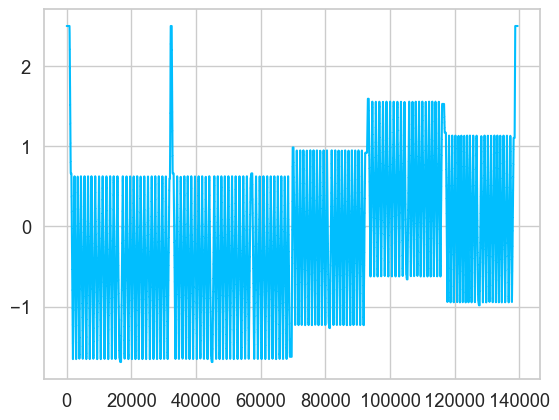

In [ ]:
data_good_1_orig['x'].plot()

In [ ]:
data_good_1_orig.head()

,a,b,x,y,z
0,-0.0,-0.0,2.5,2.5,0.0
1,-0.0,-0.0,2.5,2.5,0.0
2,-0.0,-0.0,2.5,2.5,0.0
3,-0.0,-0.0,2.5,2.5,0.0
4,-0.0,-0.0,2.5,2.5,0.0


In [ ]:
data_good_2_orig.head()

,a,b,x,y,z
0,-0.0,-0.0,2.5,2.5,-0.0
1,-0.0,-0.0,2.5,2.5,-0.0
2,-0.0,-0.0,2.5,2.5,-0.0
3,-0.0,-0.0,2.5,2.5,-0.0
4,-0.0,-0.0,2.5,2.5,-0.0


In [ ]:
data_good_3_orig.head()

,a,b,x,y,z
0,0.0,0.0,2.5,2.5,-0.0
1,0.0,0.0,2.5,2.5,-0.0
2,0.0,0.0,2.5,2.5,-0.0
3,0.0,0.0,2.5,2.5,-0.0
4,0.0,0.0,2.5,2.5,-0.0


In [ ]:
data_good_4_orig.head()

,a,b,x,y,z
0,0.0,0.0,2.5,2.5,-0.0
1,0.0,0.0,2.5,2.5,-0.0
2,0.0,0.0,2.5,2.5,-0.0
3,0.0,0.0,2.5,2.5,-0.0
4,0.0,0.0,2.5,2.5,-0.0


In [ ]:
data_good_1_orig.describe()

,a,b,x,y,z
count,139458.000000,139458.000000,139458.000000,139458.000000,139458.000000
mean,20.442925,89.586133,-0.123124,0.734354,-1.175486
std,37.635758,103.021341,0.852601,0.671768,0.489092
min,0.000000,-0.000000,-1.692400,-0.984500,-1.952900
25%,0.000000,0.000000,-0.764000,0.238700,-1.470400
50%,0.000000,90.000000,-0.140300,0.727600,-1.286000
75%,0.000000,180.000000,0.468500,1.210900,-0.683400
max,90.000000,270.000000,2.500000,2.500000,-0.000000


In [ ]:
data_good_1_orig.mean(axis=1)

0         1.00000
1         1.00000
2         1.00000
3         1.00000
4         1.00000
           ...   
139453    5.02762
139454    5.02762
139455    4.66002
139456    4.66002
139457    4.66002
Length: 139458, dtype: float64

In [ ]:
data_good_2_orig.describe()

,a,b,x,y,z
count,129693.000000,129693.000000,129693.000000,129693.000000,129693.000000
mean,19.331151,90.253238,-0.100177,0.758623,-1.174051
std,36.886057,103.442279,0.879513,0.685370,0.500141
min,0.000000,0.000000,-1.692400,-0.984500,-1.952900
25%,0.000000,0.000000,-0.749200,0.319700,-1.470400
50%,0.000000,90.000000,-0.131700,0.805800,-1.286000
75%,0.000000,180.000000,0.481300,1.291900,-0.683400
max,90.000000,270.000000,2.500000,2.500000,-0.000000


In [ ]:
data_good_3_orig.describe()

,a,b,x,y,z
count,130349.000000,130349.000000,130349.000000,130349.000000,130349.000000
mean,20.427236,89.879167,-0.119509,0.736235,-1.174449
std,37.624192,103.232064,0.858520,0.676415,0.492495
min,0.000000,0.000000,-1.692400,-0.984500,-1.952900
25%,0.000000,0.000000,-0.759400,0.238700,-1.470400
50%,0.000000,90.000000,-0.139700,0.727600,-1.286000
75%,0.000000,180.000000,0.469700,1.210900,-0.683400
max,90.000000,270.000000,2.500000,2.500000,-0.000000


In [ ]:
data_good_4_orig.describe()

,a,b,x,y,z
count,128564.000000,128564.000000,128564.000000,128564.000000,128564.000000
mean,20.269627,90.461199,-0.104777,0.743798,-1.169846
std,37.521016,103.412179,0.873136,0.686836,0.498013
min,0.000000,0.000000,-1.692400,-0.984500,-1.952900
25%,0.000000,0.000000,-0.751800,0.279900,-1.470400
50%,0.000000,90.000000,-0.128500,0.727600,-1.286000
75%,0.000000,180.000000,0.480300,1.210900,-0.683400
max,90.000000,270.000000,2.500000,2.500000,-0.000000


In [ ]:
good_1 = pd.DataFrame(data_good_1_orig.describe())
good_2 = pd.DataFrame(data_good_2_orig.describe())
good_3 = pd.DataFrame(data_good_3_orig.describe())
good_4 = pd.DataFrame(data_good_4_orig.describe())

In [ ]:
good_1.compare(good_2, keep_shape=True, keep_equal=True)

a                             b                 \
                self          other           self          other   
count  139458.000000  129693.000000  139458.000000  129693.000000   
mean       20.442925      19.331151      89.586133      90.253238   
std        37.635758      36.886057     103.021341     103.442279   
min         0.000000       0.000000      -0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000      90.000000      90.000000   
75%         0.000000       0.000000     180.000000     180.000000   
max        90.000000      90.000000     270.000000     270.000000   

                   x                             y                 \
                self          other           self          other   
count  139458.000000  129693.000000  139458.000000  129693.000000   
mean       -0.123124      -0.100177       0.734354       0.758623   
std         0.852601       0.879513       0.671768       0.685370   
min        -1.692400      -1.692400      -0.984500      -0.984500   
25%        -0.764000      -0.749200       0.238700       0.319700   
50%        -0.140300      -0.131700       0.727600       0.805800   
75%         0.468500       0.481300       1.210900       1.291900   
max         2.500000       2.500000       2.500000       2.500000   

                   z                 
                self          other  
count  139458.000000  129693.000000  
mean       -1.175486      -1.174051  
std         0.489092       0.500141  
min        -1.952900      -1.952900  
25%        -1.470400      -1.470400  
50%        -1.286000      -1.286000  
75%        -0.683400      -0.683400  
max        -0.000000      -0.000000

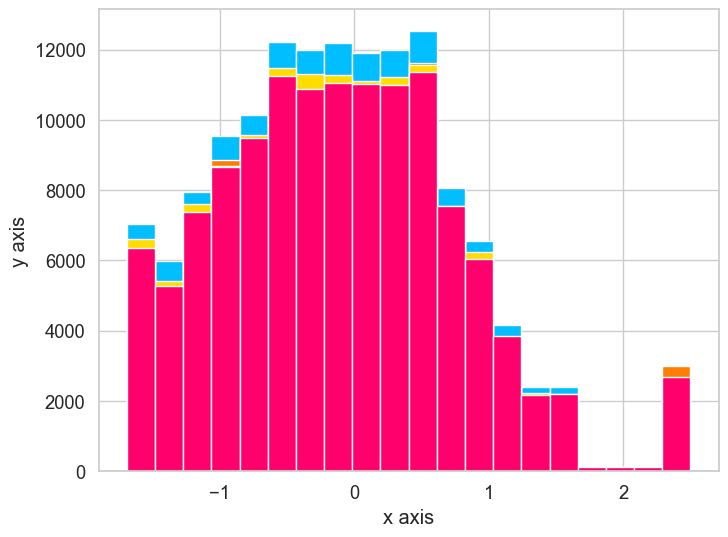

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(data_good_1_orig['x'], bins=20, stacked=True)
plt.hist(data_good_2_orig['x'], bins=20, stacked=True)
plt.hist(data_good_3_orig['x'], bins=20, stacked=True)
plt.hist(data_good_4_orig['x'], bins=20, stacked=True)
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.show()

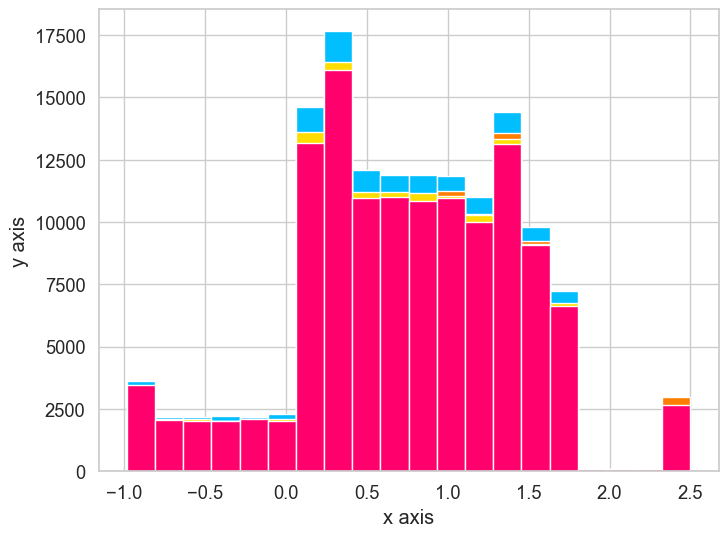

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(data_good_1_orig['y'], bins=20, stacked=True)
plt.hist(data_good_2_orig['y'], bins=20, stacked=True)
plt.hist(data_good_3_orig['y'], bins=20, stacked=True)
plt.hist(data_good_4_orig['y'], bins=20, stacked=True)
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.show()

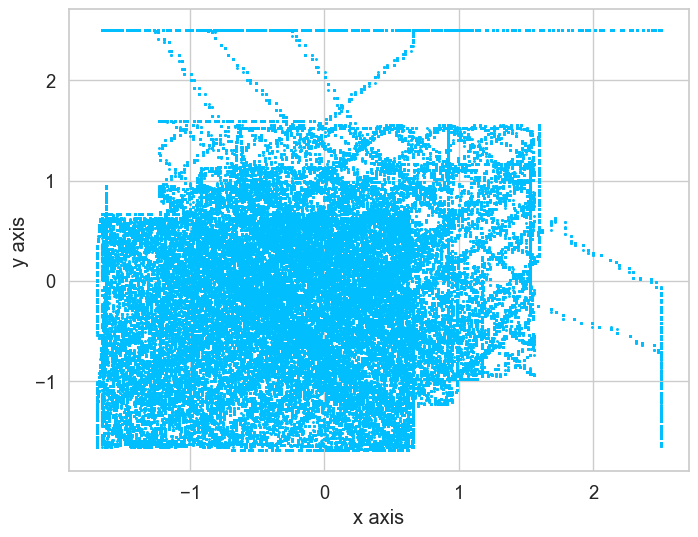

In [ ]:
plt.figure(figsize=(8, 6))

plt.scatter(data_good_1_orig['x'].iloc[:129693], data_good_2_orig['x'], marker='.', s=5)
# plt.scatter(data_good_2_orig['x'], data_good_2_orig['y'], marker='.', s=5)
# plt.scatter(data_good_3_orig['x'], data_good_3_orig['y'], marker='.', s=5)
# plt.scatter(data_good_4_orig['x'], data_good_4_orig['y'], marker='.', s=5)
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.show()

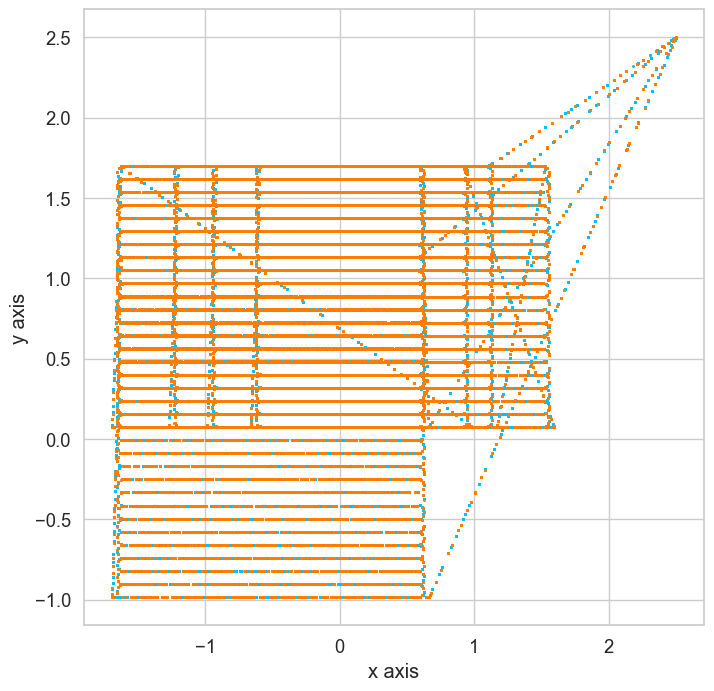

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(data_good_1_orig['x'], data_good_1_orig['y'], marker='.', s=5)
plt.scatter(data_good_2_orig['x'], data_good_2_orig['y'], marker='.', s=5)
# plt.scatter(data_good_3_orig['x'], data_good_3_orig['y'], marker='.', s=5)
# plt.scatter(data_good_4_orig['x'], data_good_4_orig['y'], marker='.', s=5)
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.show()

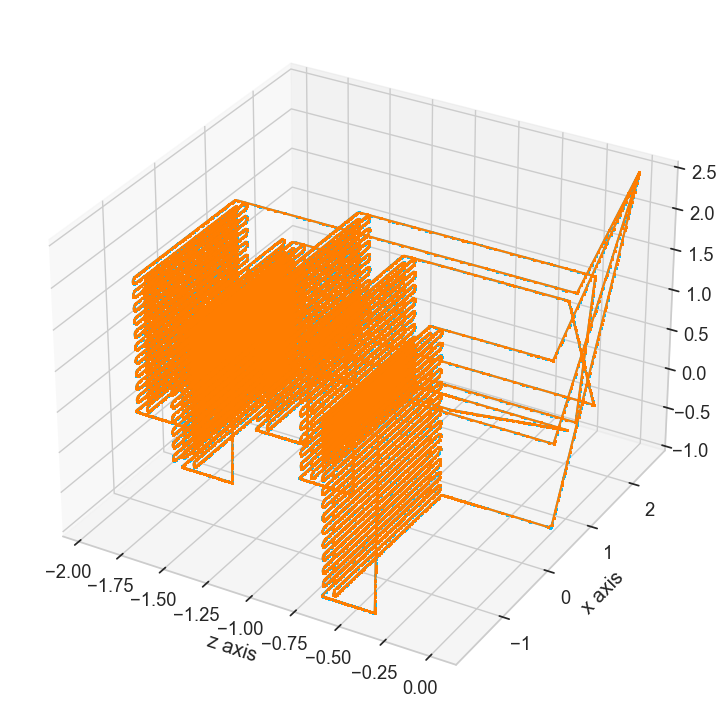

In [ ]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
# fig.canvas.draw()
# fig.set_layout_engine("none")
ax.set_position([-0.75, 0.025, 2.5, 1])
# fig = plt.figure()
# ax = Axes3D(fig)
plt.plot(data_good_1_orig['z'], data_good_1_orig['x'], data_good_1_orig['y'], marker='.', markersize=2)
plt.plot(data_good_2_orig['z'], data_good_2_orig['x'], data_good_2_orig['y'], marker='.', markersize=2)
plt.xlabel('z axis')
plt.ylabel('x axis')
plt.show()

In [ ]:

copy1 = data_good_1_orig.copy()
copy2 = data_good_2_orig.copy()
copy3 = data_good_3_orig.copy()
copy4 = data_good_4_orig.copy()
copy4 = copy4 * 1.5

In [ ]:
copy4

,a,b,x,y,z
0,0.0,0.0,3.75,3.75,-0.0
1,0.0,0.0,3.75,3.75,-0.0
2,0.0,0.0,3.75,3.75,-0.0
3,0.0,0.0,3.75,3.75,-0.0
4,0.0,0.0,3.75,3.75,-0.0
...,...,...,...,...,...
128559,0.0,0.0,3.75,3.75,-0.0
128560,0.0,0.0,3.75,3.75,-0.0
128561,0.0,0.0,3.75,3.75,-0.0
128562,0.0,0.0,3.75,3.75,-0.0


In [ ]:
data_combined = np.concatenate([copy1['x'], copy2['x'], copy3['x'], copy4['x']], axis=0)
data_combinedy = np.concatenate([copy1['y'], copy2['y'], copy3['y'], copy4['y']], axis=0)
data_combined = pd.DataFrame(data_combined)
data_combinedy = pd.DataFrame(data_combinedy)

In [ ]:
data_combined

,0
0,2.50
1,2.50
2,2.50
3,2.50
4,2.50
...,...
528059,3.75
528060,3.75
528061,3.75
528062,3.75


In [ ]:
data_combinedy

,0
0,2.50
1,2.50
2,2.50
3,2.50
4,2.50
...,...
528059,3.75
528060,3.75
528061,3.75
528062,3.75


In [ ]:
data_combinedxy = np.concatenate([data_combined, data_combinedy], axis=1)
data_combinedxy = pd.DataFrame(data_combinedxy)
data_combinedxy.columns = ['x', 'y']

In [ ]:
data_combinedxy

,x,y
0,2.50,2.50
1,2.50,2.50
2,2.50,2.50
3,2.50,2.50
4,2.50,2.50
...,...,...
528059,3.75,3.75
528060,3.75,3.75
528061,3.75,3.75
528062,3.75,3.75


In [ ]:
outliers_fraction = 0.1

clf = LocalOutlierFactor(n_neighbors=15, contamination='auto')
y_pred = clf.fit_predict(data_combinedxy)

c:\Users\jas45\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(


In [ ]:
data_combinedxy

,x,y
0,2.50,2.50
1,2.50,2.50
2,2.50,2.50
3,2.50,2.50
4,2.50,2.50
...,...,...
528059,3.75,3.75
528060,3.75,3.75
528061,3.75,3.75
528062,3.75,3.75


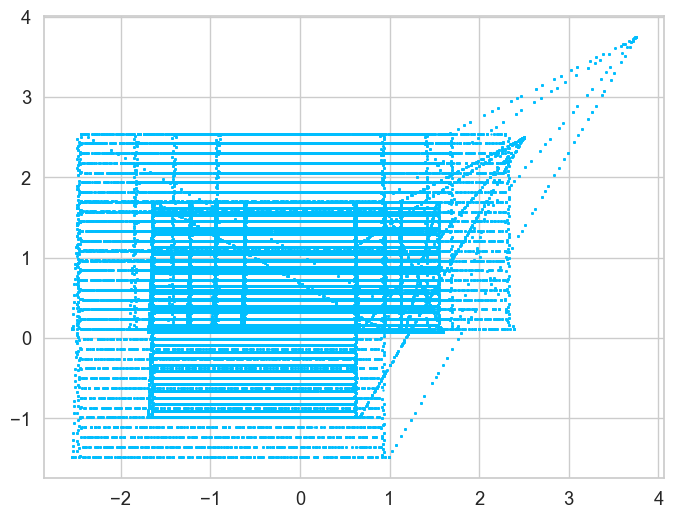

In [ ]:
data_combinedxy['anomaly'] = y_pred

plt.figure(figsize=(8, 6))
plt.scatter(data_combinedxy['x'], data_combinedxy['y'], s=0.5)
plt.show()

In [ ]:
data_xy_copy = data_combinedxy.copy()
shuffled_df = data_combinedxy.copy()

In [ ]:
# shuffled_df['x'] = data_xy_copy['x'].sample(frac=1).reset_index(drop=True) # shuffles the dataframe
# shuffled_df['y'] = data_xy_copy['y'].sample(frac=1).reset_index(drop=True)

In [ ]:
data_xy_copy = data_xy_copy.drop(columns=['anomaly'])

In [ ]:
data_xy_copy

,x,y
0,2.50,2.50
1,2.50,2.50
2,2.50,2.50
3,2.50,2.50
4,2.50,2.50
...,...,...
528059,3.75,3.75
528060,3.75,3.75
528061,3.75,3.75
528062,3.75,3.75


In [ ]:
shuffled_df

,x,y,anomaly
0,2.50,2.50,1
1,2.50,2.50,1
2,2.50,2.50,1
3,2.50,2.50,1
4,2.50,2.50,1
...,...,...,...
528059,3.75,3.75,1
528060,3.75,3.75,1
528061,3.75,3.75,1
528062,3.75,3.75,1


In [ ]:
# plt.figure(figsize=(8, 6))
# plt.scatter(shuffled_df['x'], shuffled_df['y'], color='b', s=0.7)
# # plt.scatter(anomalies['x'], anomalies['y'], color='r', label='Detected Anomalies', s=0.7)
# plt.title('shuffled')
# plt.legend()

# plt.show()

In [ ]:
p_data_df = data_xy_copy
xy_groups = 500
xy_splits = {}

for i in range(0, xy_groups, 1):
    p_data_split = p_data_df[(len(p_data_df)//xy_groups)*(i):(len(p_data_df)//xy_groups)*(i+1)] # splits shuffled data into groups
    xy_splits[f'split_{i}'] = pd.DataFrame(p_data_split)


pocket_split_std_features = {}
pocket_split_mean_features = {}

for i in range(0, xy_groups, 1):
    p_data_std_features = pd.DataFrame(xy_splits[f'split_{i}']).std()
    pocket_split_std_features[f'split_{i}'] = p_data_std_features

for i in range(0, xy_groups, 1):
    p_data_mean_features = pd.DataFrame(xy_splits[f'split_{i}']).mean()
    pocket_split_mean_features[f'split_{i}'] = p_data_mean_features


In [ ]:
xy_splits['split_0']

,x,y
0,2.5000,2.5000
1,2.5000,2.5000
2,2.5000,2.5000
3,2.5000,2.5000
4,2.5000,2.5000
...,...,...
1051,1.6037,0.8015
1052,1.6037,0.8015
1053,1.5483,0.6965
1054,1.5483,0.6965


In [ ]:
# def batch_parser(batch_dict):
#     print("Testing")

#     split_features = {}

#     for i in range(0, 500, 1):
#         data_features = pd.DataFrame(batch_dict[f'split_{i}']).mean()
#         split_features[f'split_{i}'] = data_features
#         # data_features[i] = data_features

#     data_features_df = pd.DataFrame.from_dict(split_features, orient='index')

#     return data_features_df

In [ ]:
# batch_df = batch_parser(xy_splits)

In [ ]:
batch_df.head()

,x,y
split_0,2.418415,2.345400
split_1,-0.139354,-0.829335
split_2,-0.526777,-0.824455
split_3,-0.482375,-0.651831
split_4,-0.532823,-0.483859


In [ ]:
for i in range(0, 500, 1):
    data_features = batch_df.iloc[i]
    #split_features[f'split_{i}'] = data_features
    print(data_features)
    

x    2.418415
y    2.345400
Name: split_0, dtype: float64
x   -0.139354
y   -0.829335
Name: split_1, dtype: float64
x   -0.526777
y   -0.824455
Name: split_2, dtype: float64
x   -0.482375
y   -0.651831
Name: split_3, dtype: float64
x   -0.532823
y   -0.483859
Name: split_4, dtype: float64
x   -0.511191
y   -0.327536
Name: split_5, dtype: float64
x   -0.498799
y   -0.167504
Name: split_6, dtype: float64
x   -0.518888
y   -0.009366
Name: split_7, dtype: float64
x   -0.471614
y    0.136867
Name: split_8, dtype: float64
x   -0.463504
y    0.284599
Name: split_9, dtype: float64
x   -0.387537
y    0.440546
Name: split_10, dtype: float64
x   -0.480411
y    0.589327
Name: split_11, dtype: float64
x   -0.499662
y    0.739157
Name: split_12, dtype: float64
x   -0.503065
y    0.892736
Name: split_13, dtype: float64
x   -0.542642
y    1.042719
Name: split_14, dtype: float64
x   -1.321362
y    0.179770
Name: split_15, dtype: float64
x   -0.490586
y   -0.933318
Name: split_16, dtype: float64
x   -0.

In [ ]:


def anomaly_detection(i):
    print(f"Task executed at {time.ctime()}")
    print("Testing")

    
    split_features = {}

    # for i in range(0, 500, 1):
    
    data_features = pd.DataFrame(xy_splits[f'split_{i}']) #.mean()
    # split_features[f'split_{i}'] = data_features
    
    split_features = data_features
    i += 1

    print("split_features: ", split_features)
    
    # data_features_df = pd.DataFrame.from_dict(split_features, orient='index')
    
    df = split_features
    print("df: ", df)
    clf = LocalOutlierFactor(n_neighbors=15, contamination='auto')
    y_pred = clf.fit_predict(df)

    df['anomaly'] = y_pred
    
    # df = np.concatenate([df, data_features], axis=0)
    
    # Plot the normal points
    normal_points = df[df['anomaly'] == 1]
    # Plot the anomalies
    anomalies = df[df['anomaly'] == -1]

    # # Plot original data
    # axs[0].scatter(df['x1'][:n_inliers], df['x2'][:n_inliers], color='b', label='Normal Points')
    # axs[0].scatter(df['x1'][n_inliers:], df['x2'][n_inliers:], color='grey', label='Actual Anomalies')
    # axs[0].set_title('Original Data')
    # axs[0].legend()

    plt.figure(figsize=(12, 10))
    plt.scatter(normal_points['x'], normal_points['y'], color='b', label='Normal Points', s=0.7)
    plt.scatter(anomalies['x'], anomalies['y'], color='r', label='Detected Anomalies', s=0.7)
    plt.title('Anomaly Detection Results with k-NN')
    plt.legend()
    plt.show()
    return i

def indexer():
    anomaly_detection(xy_splits, 1)
    # j = 0
    return anomaly_detection(xy_splits, 1)

# schedule.every(5).seconds.do(batch_parser(xy_splits))
# schedule.every(5).seconds.do(indexer())
schedule.every(5).seconds.do(anomaly_detection)

while True:
    schedule.run_pending()
    time.sleep(1)


TypeError: anomaly_detection() missing 1 required positional argument: 'batch_parser'

In [ ]:
indexer()

1

In [ ]:
print(len(xy_splits))

500


split_features:             x       y
0     2.5000  2.5000
1     2.5000  2.5000
2     2.5000  2.5000
3     2.5000  2.5000
4     2.5000  2.5000
...      ...     ...
1051  1.6037  0.8015
1052  1.6037  0.8015
1053  1.5483  0.6965
1054  1.5483  0.6965
1055  1.5483  0.6965

[1056 rows x 2 columns]
df:             x       y
0     2.5000  2.5000
1     2.5000  2.5000
2     2.5000  2.5000
3     2.5000  2.5000
4     2.5000  2.5000
...      ...     ...
1051  1.6037  0.8015
1052  1.6037  0.8015
1053  1.5483  0.6965
1054  1.5483  0.6965
1055  1.5483  0.6965

[1056 rows x 2 columns]


c:\Users\jas45\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(


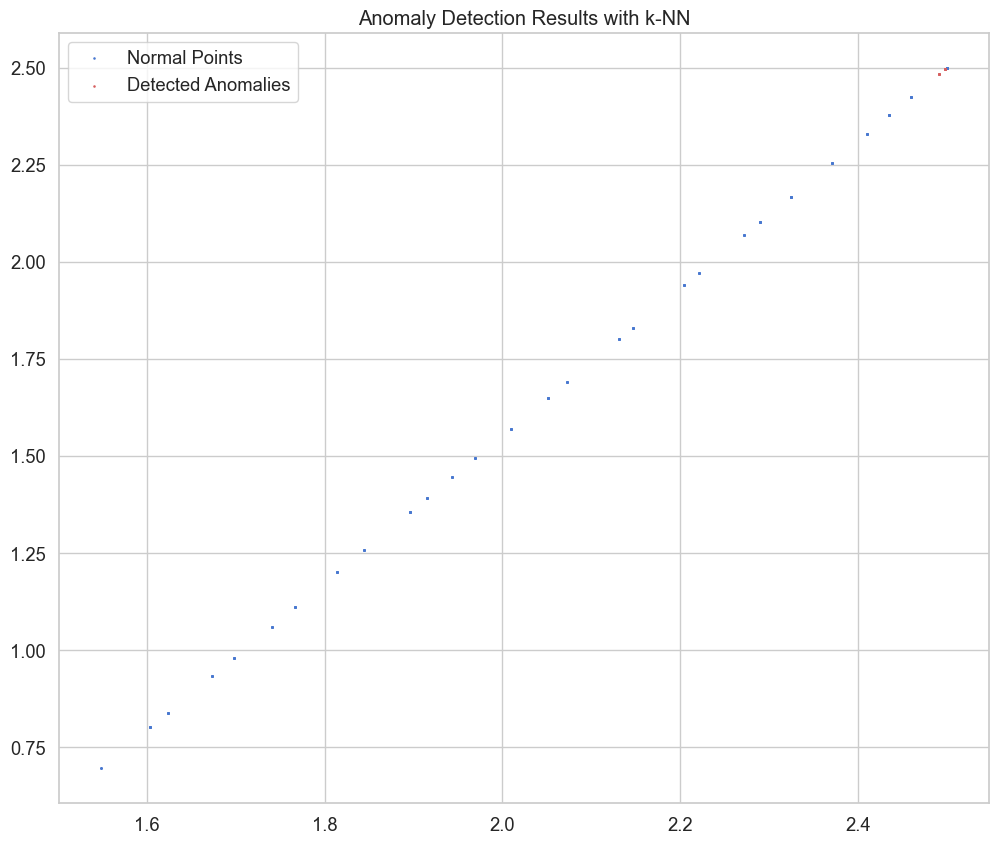

In [ ]:
i = 0

split_features = {}

# for i in range(0, 500, 1):
data_features = pd.DataFrame(xy_splits[f'split_{i}']) #.mean()
# split_features[f'split_{i}'] = data_features
    
split_features = data_features

print("split_features: ", split_features)
    
# data_features_df = pd.DataFrame.from_dict(split_features, orient='index')
    
df = split_features
print("df: ", df)
clf = LocalOutlierFactor(n_neighbors=15, contamination='auto')
y_pred = clf.fit_predict(df)

df['anomaly'] = y_pred
    
# df = np.concatenate([df, data_features], axis=0)
    
# Plot the normal points
normal_points = df[df['anomaly'] == 1]
# Plot the anomalies
anomalies = df[df['anomaly'] == -1]

# # Plot original data
# axs[0].scatter(df['x1'][:n_inliers], df['x2'][:n_inliers], color='b', label='Normal Points')
# axs[0].scatter(df['x1'][n_inliers:], df['x2'][n_inliers:], color='grey', label='Actual Anomalies')
# axs[0].set_title('Original Data')
# axs[0].legend()

plt.figure(figsize=(12, 10))
plt.scatter(normal_points['x'], normal_points['y'], color='b', label='Normal Points', s=0.7)
plt.scatter(anomalies['x'], anomalies['y'], color='r', label='Detected Anomalies', s=0.7)
plt.title('Anomaly Detection Results with k-NN')
plt.legend()
plt.show()

c:\Users\jas45\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


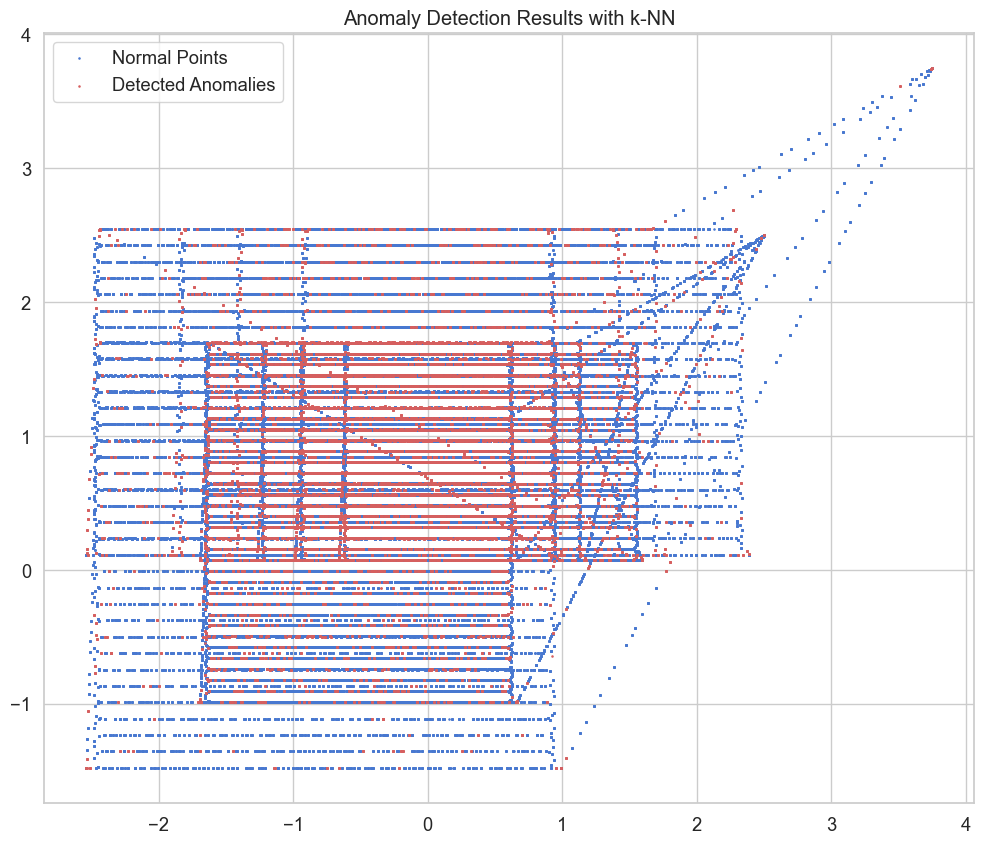

In [ ]:
# Plot the normal points
normal_points = data_combinedxy[data_combinedxy['anomaly'] == 1]
# Plot the anomalies
anomalies = data_combinedxy[data_combinedxy['anomaly'] == -1]

# # Plot original data
# axs[0].scatter(df['x1'][:n_inliers], df['x2'][:n_inliers], color='b', label='Normal Points')
# axs[0].scatter(df['x1'][n_inliers:], df['x2'][n_inliers:], color='grey', label='Actual Anomalies')
# axs[0].set_title('Original Data')
# axs[0].legend()

plt.figure(figsize=(12, 10))
plt.scatter(normal_points['x'], normal_points['y'], color='b', label='Normal Points', s=0.7)
plt.scatter(anomalies['x'], anomalies['y'], color='r', label='Detected Anomalies', s=0.7)
plt.title('Anomaly Detection Results with k-NN')
plt.legend()

plt.show()


In [ ]:
copy4

,a,b,x,y,z
0,0.0,0.0,3.75,3.75,-0.0
1,0.0,0.0,3.75,3.75,-0.0
2,0.0,0.0,3.75,3.75,-0.0
3,0.0,0.0,3.75,3.75,-0.0
4,0.0,0.0,3.75,3.75,-0.0
...,...,...,...,...,...
128559,0.0,0.0,3.75,3.75,-0.0
128560,0.0,0.0,3.75,3.75,-0.0
128561,0.0,0.0,3.75,3.75,-0.0
128562,0.0,0.0,3.75,3.75,-0.0


In [ ]:
data_combinedxy

,x,y,anomaly
0,2.50,2.50,1
1,2.50,2.50,1
2,2.50,2.50,1
3,2.50,2.50,1
4,2.50,2.50,1
...,...,...,...
528059,3.75,3.75,1
528060,3.75,3.75,1
528061,3.75,3.75,1
528062,3.75,3.75,1


In [ ]:
anomalies

,x,y,anomaly
1086,1.39740,0.41050,-1
1087,1.39740,0.41050,-1
1088,1.39740,0.41050,-1
1089,1.39740,0.41050,-1
1090,1.39740,0.41050,-1
...,...,...,...
526743,3.74985,3.74985,-1
526744,3.74985,3.74985,-1
526745,3.74985,3.74985,-1
526746,3.74985,3.74985,-1


In [ ]:
print("Percent detected: ", ((len(anomalies)/(len(copy4))) * 100))

Percent detected:  91.16082262530723


In [ ]:
spiral_gcode_a = spiral_gcode_orig.copy()
spiral_gcode_b = spiral_gcode_orig.copy()
spiral_gcode_x = spiral_gcode_orig.copy()
spiral_gcode_y = spiral_gcode_orig.copy()
spiral_gcode_z = spiral_gcode_orig.copy()

spiralmaska = ~spiral_gcode_a.astype(str).apply(lambda col: col.str.contains('A', na=False))
# Replace values in the DataFrame where the mask is True with 0
spiral_gcode_a[spiralmaska] = 0

spiralmaskb = ~spiral_gcode_b.astype(str).apply(lambda col1: col1.str.contains('B', na=False))
spiral_gcode_b[spiralmaskb] = 0

spiralmaskx = ~spiral_gcode_x.astype(str).apply(lambda col2: col2.str.contains('X', na=False))
spiral_gcode_x[spiralmaskx] = 0

spiralmasky = ~spiral_gcode_y.astype(str).apply(lambda col3: col3.str.contains('Y', na=False))
spiral_gcode_y[spiralmasky] = 0

spiralmaskz = ~spiral_gcode_z.astype(str).apply(lambda col4: col4.str.contains('Z', na=False))
spiral_gcode_z[spiralmaskz] = 0


aspiralmelted_df = spiral_gcode_a.reset_index().melt(id_vars='index', var_name='original_column', value_name='value')
non_zero_values = aspiralmelted_df[aspiralmelted_df['value'] != 0]
combined_column = non_zero_values.groupby('index')['value'].apply(list)
result_series = combined_column.reindex(spiral_gcode_a.index, fill_value=0)
a_spiral_df = pd.DataFrame(result_series)
a_spiral_df.columns = ['b']

bspiralmelted_df = spiral_gcode_b.reset_index().melt(id_vars='index', var_name='original_column', value_name='value')
non_zero_values = bspiralmelted_df[bspiralmelted_df['value'] != 0]
combined_column = non_zero_values.groupby('index')['value'].apply(list)
result_series = combined_column.reindex(spiral_gcode_b.index, fill_value=0)
b_spiral_df = pd.DataFrame(result_series)
b_spiral_df.columns = ['b']

xspiralmelted_df = spiral_gcode_x.reset_index().melt(id_vars='index', var_name='original_column', value_name='value')
non_zero_values = xspiralmelted_df[xspiralmelted_df['value'] != 0]
combined_column = non_zero_values.groupby('index')['value'].apply(list)
result_series = combined_column.reindex(spiral_gcode_x.index, fill_value=0)
x_spiral_df = pd.DataFrame(result_series)
x_spiral_df.columns = ['x']

yspiralmelted_df = spiral_gcode_y.reset_index().melt(id_vars='index', var_name='original_column', value_name='value')
non_zero_values = yspiralmelted_df[yspiralmelted_df['value'] != 0]
combined_column = non_zero_values.groupby('index')['value'].apply(list)
result_series = combined_column.reindex(spiral_gcode_y.index, fill_value=0)
y_spiral_df = pd.DataFrame(result_series)
y_spiral_df.columns = ['y']

zspiralmelted_df = spiral_gcode_z.reset_index().melt(id_vars='index', var_name='original_column', value_name='value')
non_zero_values = zspiralmelted_df[zspiralmelted_df['value'] != 0]
combined_column = non_zero_values.groupby('index')['value'].apply(list)
result_series = combined_column.reindex(spiral_gcode_z.index, fill_value=0)
z_spiral_df = pd.DataFrame(result_series)
z_spiral_df.columns = ['z']

spiral_df = pd.concat([a_spiral_df, b_spiral_df, x_spiral_df, y_spiral_df, z_spiral_df], axis=1)
spiral_df.to_csv('spiral_gcode_movement_num.csv', index=False)

In [ ]:
gcode_movement_values = pd.read_csv("gcode_movement_num.csv", delimiter=',')